In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier, VotingClassifier,BaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn. neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, ConfusionMatrixDisplay
from prettytable import PrettyTable
import time

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.tail(20)

id  gender    age  hypertension  heart_disease ever_married  \
5090   4211    Male  26.00             0              0           No   
5091   6369    Male  59.00             1              0          Yes   
5092  56799    Male  76.00             0              0          Yes   
5093  32235  Female  45.00             1              0          Yes   
5094  28048    Male  13.00             0              0           No   
5095  68598    Male   1.08             0              0           No   
5096  41512    Male  57.00             0              0          Yes   
5097  64520    Male  68.00             0              0          Yes   
5098    579    Male   9.00             0              0           No   
5099   7293    Male  40.00             0              0          Yes   
5100  68398    Male  82.00             1              0          Yes   
5101  36901  Female  45.00             0              0          Yes   
5102  45010  Female  57.00             0              0          Yes   
5103  22127  Female  18.00             0              0           No   
5104  14180  Female  13.00             0              0           No   
5105  18234  Female  80.00             1              0          Yes   
5106  44873  Female  81.00             0              0          Yes   
5107  19723  Female  35.00             0              0          Yes   
5108  37544    Male  51.00             0              0          Yes   
5109  44679  Female  44.00             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5090       Govt_job          Rural             100.85  21.0           smokes   
5091        Private          Rural              95.05  30.9     never smoked   
5092       Govt_job          Urban              82.35  38.9     never smoked   
5093       Govt_job          Rural              95.02   NaN           smokes   
5094       children          Urban              82.38  24.3          Unknown   
5095       children          Rural              79.15  17.4          Unknown   
5096       Govt_job          Rural              76.62  28.2     never smoked   
5097  Self-employed          Urban              91.68  40.8          Unknown   
5098       children          Urban              71.88  17.5          Unknown   
5099        Private          Rural              83.94   NaN           smokes   
5100  Self-employed          Rural              71.97  28.3     never smoked   
5101        Private          Urban              97.95  24.5          Unknown   
5102        Private          Rural              77.93  21.7     never smoked   
5103        Private          Urban              82.85  46.9          Unknown   
5104       children          Rural             103.08  18.6          Unknown   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
5090       0  
5091       0  
5092       0  
5093       0  
5094       0  
5095       0  
5096       0  
5097       0  
5098       0  
5099       0  
5100       0  
5101       0  
5102       0  
5103       0  
5104       0  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [ ]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
df[df.isnull().any(axis=1)]

id  gender   age  hypertension  heart_disease ever_married  \
1     51676  Female  61.0             0              0          Yes   
8     27419  Female  59.0             0              0          Yes   
13     8213    Male  78.0             0              1          Yes   
19    25226    Male  57.0             0              1           No   
27    61843    Male  58.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5039  42007    Male  41.0             0              0           No   
5048  28788    Male  40.0             0              0          Yes   
5093  32235  Female  45.0             1              0          Yes   
5099   7293    Male  40.0             0              0          Yes   
5105  18234  Female  80.0             1              0          Yes   

          work_type Residence_type  avg_glucose_level  bmi   smoking_status  \
1     Self-employed          Rural             202.21  NaN     never smoked   
8           Private          Rural              76.15  NaN          Unknown   
13          Private          Urban             219.84  NaN          Unknown   
19         Govt_job          Urban             217.08  NaN          Unknown   
27          Private          Rural             189.84  NaN          Unknown   
...             ...            ...                ...  ...              ...   
5039        Private          Rural              70.15  NaN  formerly smoked   
5048        Private          Urban             191.15  NaN           smokes   
5093       Govt_job          Rural              95.02  NaN           smokes   
5099        Private          Rural              83.94  NaN           smokes   
5105        Private          Urban              83.75  NaN     never smoked   

      stroke  
1          1  
8          1  
13         1  
19         1  
27         1  
...      ...  
5039       0  
5048       0  
5093       0  
5099       0  
5105       0  

[201 rows x 12 columns]

## Visualine

Biểu đồ đếm số lượng ca đột quỵ

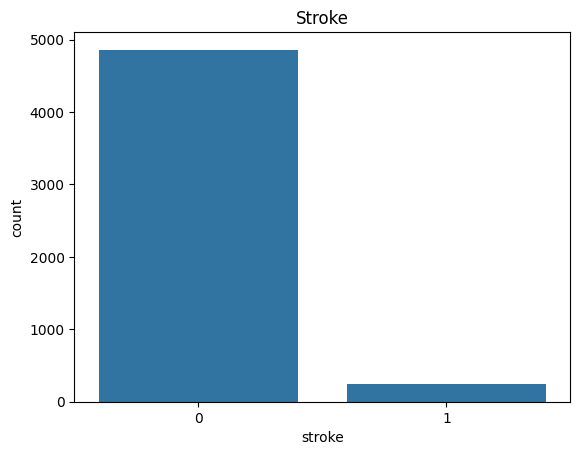

In [ ]:
sns.countplot(x='stroke', data=df)
plt.title("Stroke")
plt.show()

Biểu đồ phân bố tuổi theo đột quỵ

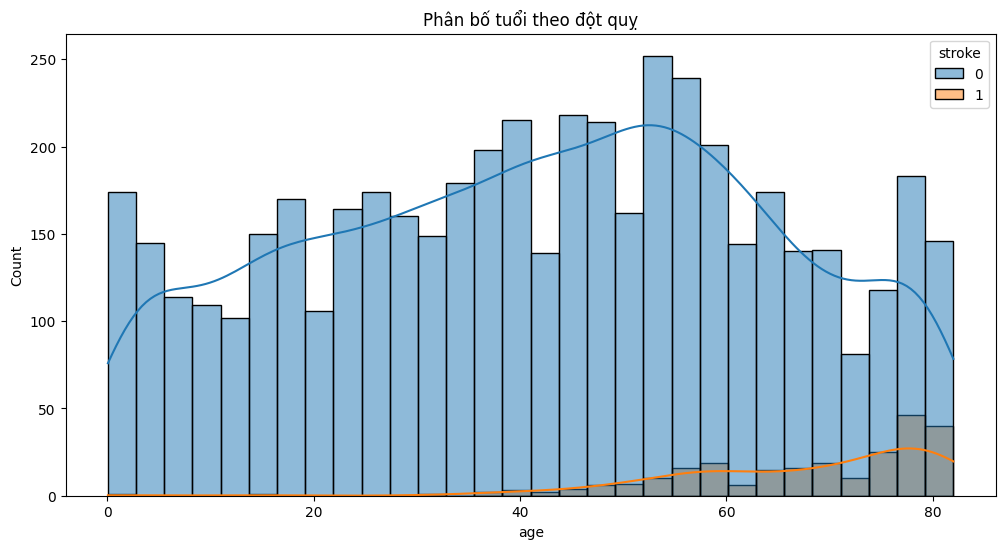

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="age", hue="stroke", bins=30, kde=True)
plt.title("Phân bố tuổi theo đột quỵ")
plt.show()

Biểu đồ đếm tăng huyết áp và đột quỵ

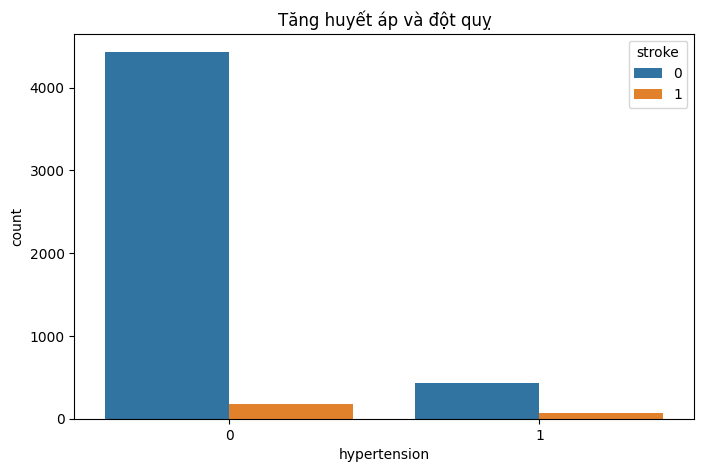

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="hypertension", hue="stroke")
plt.title("Tăng huyết áp và đột quỵ")
plt.show()

Biểu đồ phân bố mức đường huyết trung bình theo đột quỵ

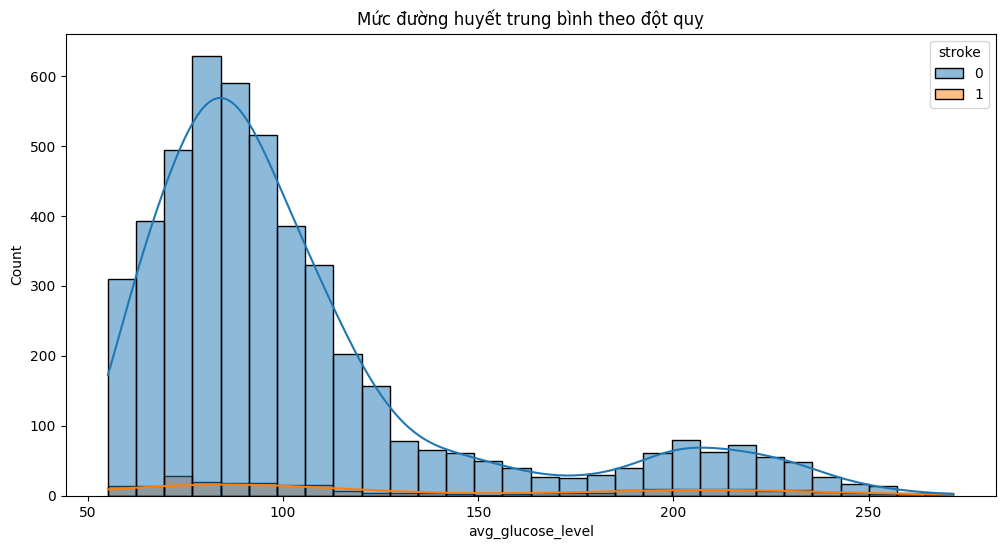

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="avg_glucose_level", hue="stroke", bins=30, kde=True)
plt.title("Mức đường huyết trung bình theo đột quỵ")
plt.show()

Biểu đồ phân bố BMI theo đột quỵ

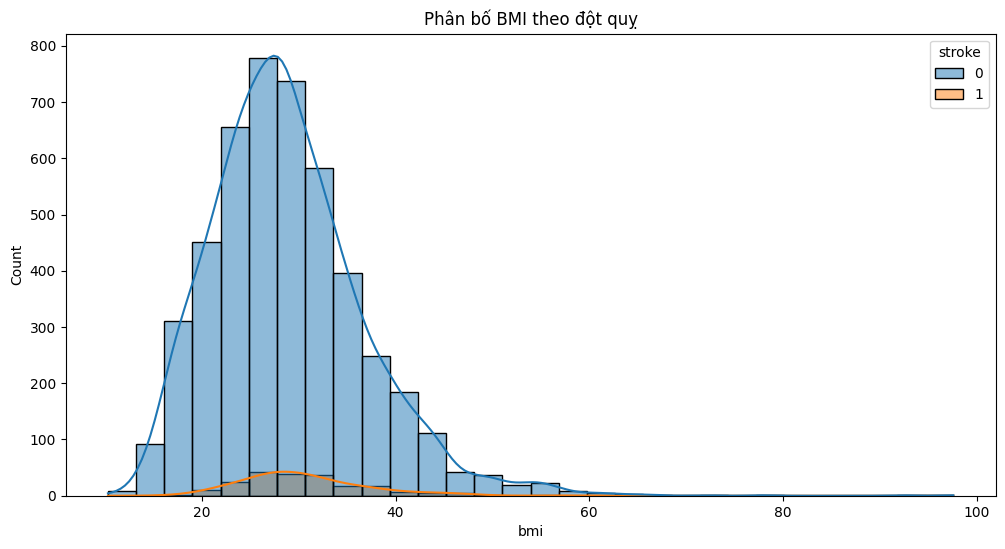

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="bmi", hue="stroke", bins=30, kde=True)
plt.title("Phân bố BMI theo đột quỵ")
plt.show()

Biểu đồ scatter giữa tuổi và mức đường huyết trung bình

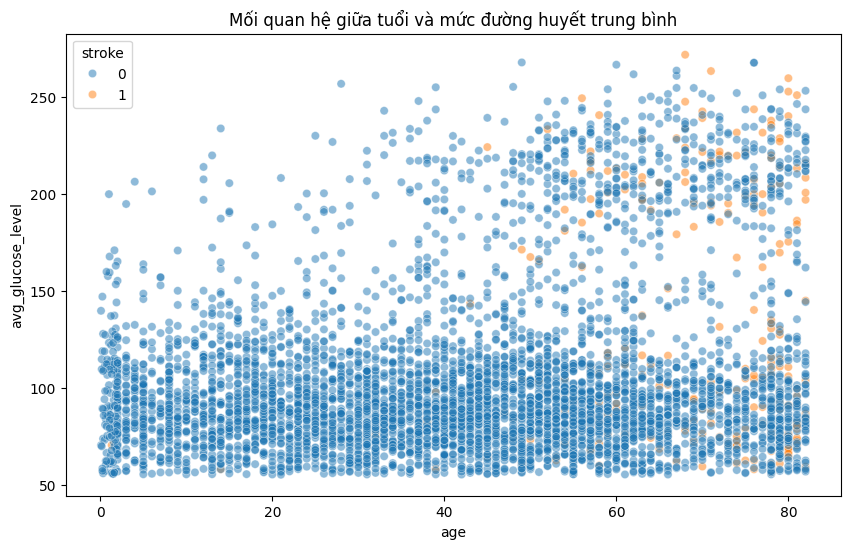

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="age", y="avg_glucose_level", hue="stroke", alpha=0.5)
plt.title("Mối quan hệ giữa tuổi và mức đường huyết trung bình")
plt.show()

Biểu đồ scatter giữa tuổi và BMI

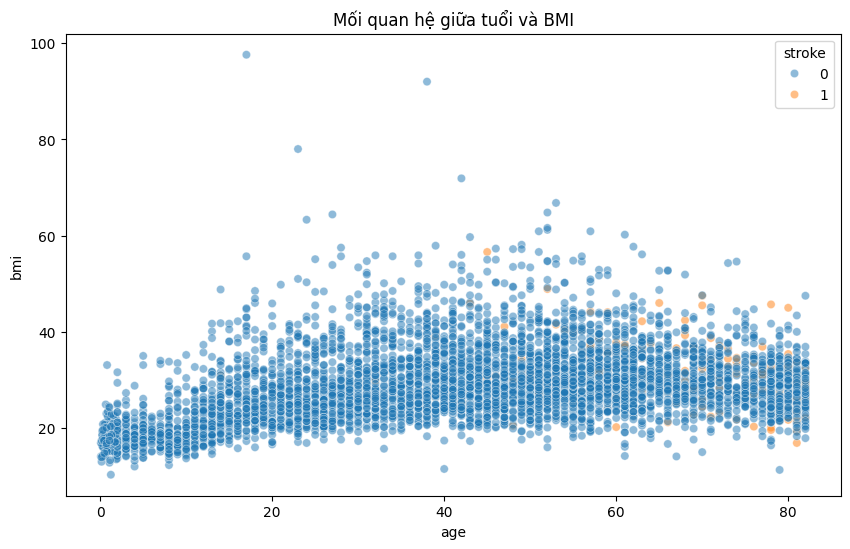

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="age", y="bmi", hue="stroke", alpha=0.5)
plt.title("Mối quan hệ giữa tuổi và BMI")
plt.show()

Biểu đồ scatter giữa mức đường huyết trung bình và BMI

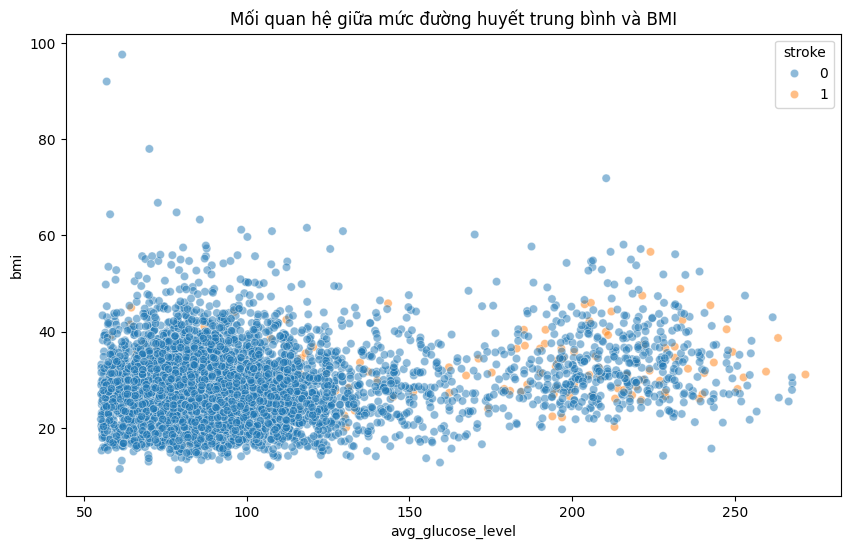

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="avg_glucose_level", y="bmi", hue="stroke", alpha=0.5)
plt.title("Mối quan hệ giữa mức đường huyết trung bình và BMI")
plt.show()

Biểu đồ boxplot tuổi theo tình trạng đột quỵ

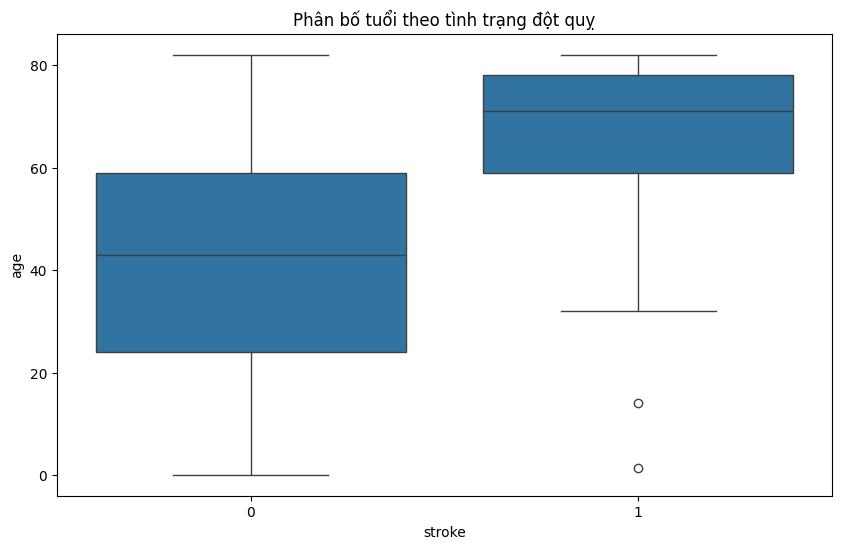

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="stroke", y="age")
plt.title("Phân bố tuổi theo tình trạng đột quỵ")
plt.show()

Biểu đồ boxplot mức đường huyết trung bình theo đột quỵ

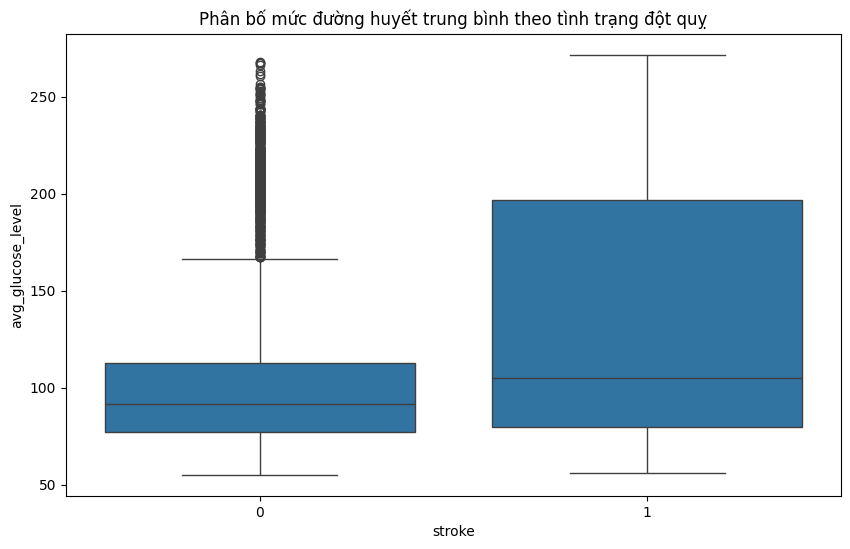

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="stroke", y="avg_glucose_level")
plt.title("Phân bố mức đường huyết trung bình theo tình trạng đột quỵ")
plt.show()

Biểu đồ đếm đột quỵ theo giới tính

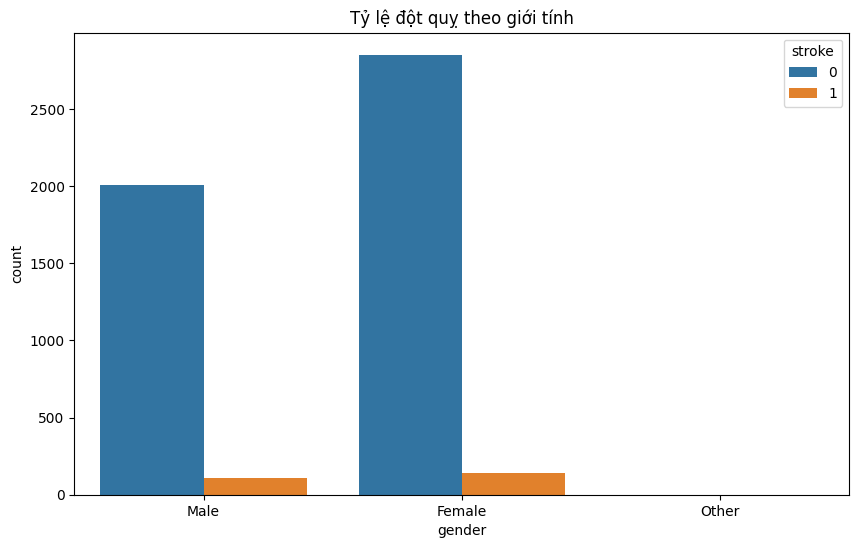

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="gender", hue="stroke")
plt.title("Tỷ lệ đột quỵ theo giới tính")
plt.show()

Biểu đồ đếm đột quỵ theo loại nghề nghiệp

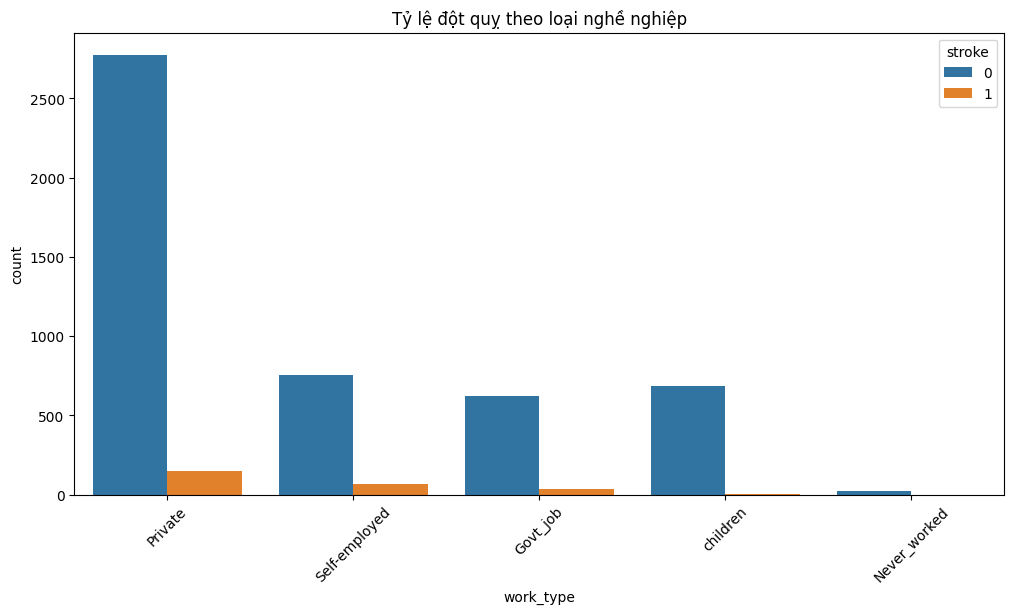

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="work_type", hue="stroke")
plt.title("Tỷ lệ đột quỵ theo loại nghề nghiệp")
plt.xticks(rotation=45)
plt.show()

Biểu đồ violin của tuổi theo tình trạng hút thuốc

<Axes: xlabel='smoking_status', ylabel='age'>

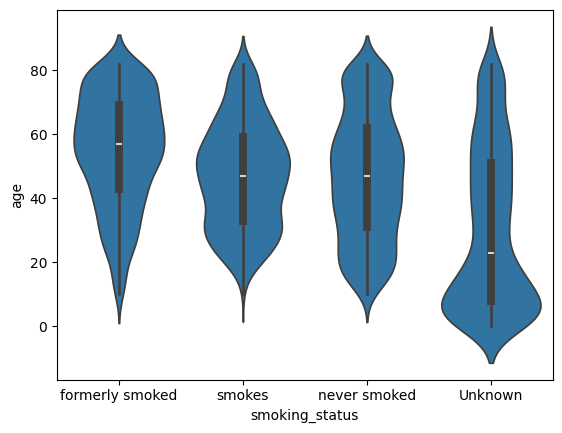

In [ ]:
sns.violinplot(x='smoking_status', y='age', data=df, order=['formerly smoked', 'smokes', 'never smoked', 'Unknown'])

Biểu đồ đếm bệnh tim và đột quỵ

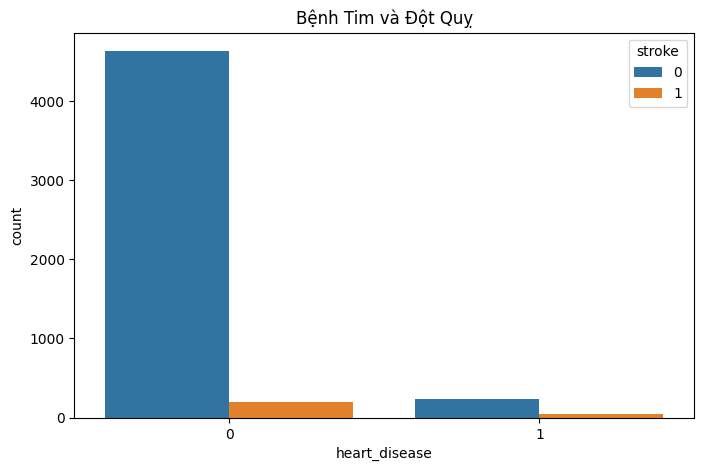

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="heart_disease", hue="stroke")
plt.title("Bệnh Tim và Đột Quỵ")
plt.show()


Biểu đồ đếm tình trạng kết hôn và đột quỵ

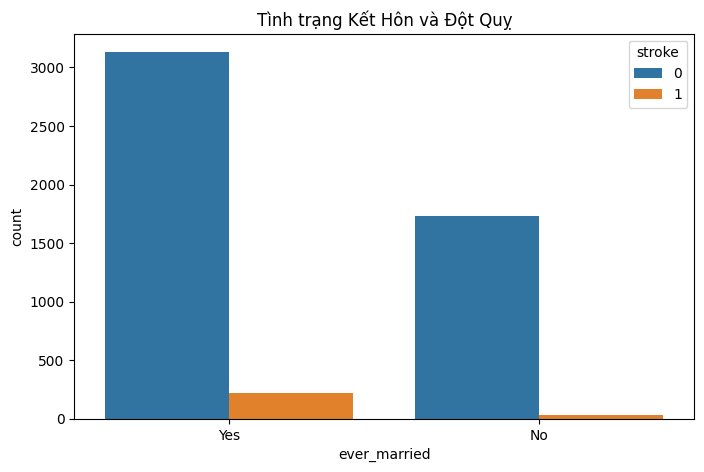

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="ever_married", hue="stroke")
plt.title("Tình trạng Kết Hôn và Đột Quỵ")
plt.show()


Biểu đồ đếm loại nơi cư trú và đột quỵ

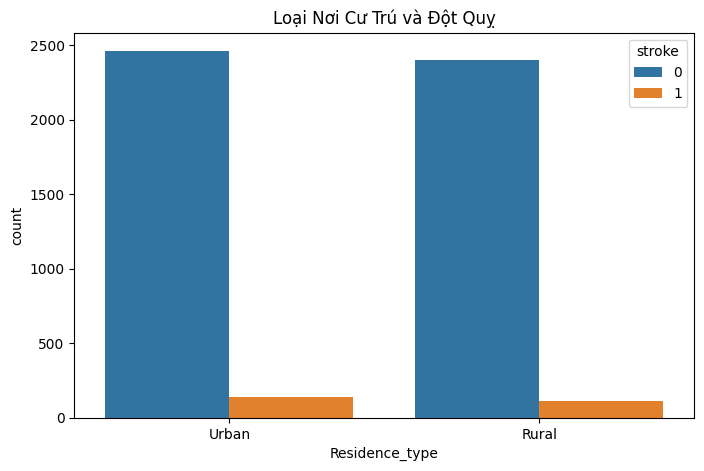

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Residence_type", hue="stroke")
plt.title("Loại Nơi Cư Trú và Đột Quỵ")
plt.show()


phân bố các nhóm tình trạng hút thuốc theo tình trạng đột quỵ

<Axes: xlabel='smoking_status', ylabel='Count'>

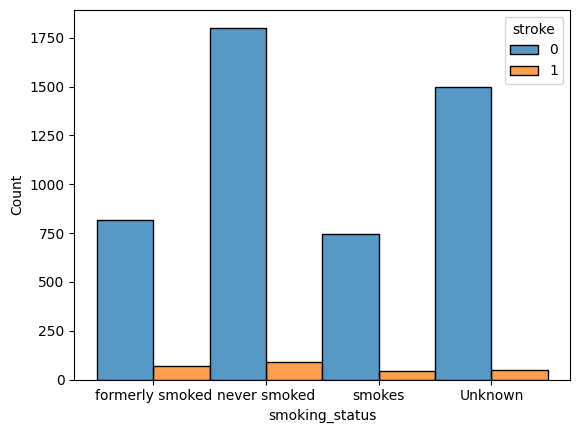

In [ ]:
sns.histplot(x='smoking_status',data=df,hue='stroke',multiple='dodge')

## Age

In [ ]:
def age_number(age):
    if age <= 10:
        return '0'
    elif 10 < age <= 20:
        return '1'
    elif 20 < age <= 30:
        return '2'    
    elif 30 < age <= 40:
        return '3'
    elif 40 < age <= 50:
        return '4'
    elif 50 < age <= 60:
        return '5'
    elif 60 < age <= 70:
        return '6'
    elif 70 < age <= 80:
        return '7'
    elif 80 < age <= 90:
        return '8'
    else:
        return '9'

df['age_number'] = df['age'].apply(age_number)
age_pro = df.groupby(['age_number', 'stroke']).size().reset_index(name='count')
total_counts = df.groupby('age_number')['id'].count().reset_index(name='total_count')
age_pro = age_pro.merge(total_counts, on='age_number', how='left')
age_pro['proportion'] = round((age_pro['count'] / age_pro['total_count']), 2)
age_pro

age_number  stroke  count  total_count  proportion
0           0       0    506          507        1.00
1           0       1      1          507        0.00
2           1       0    517          518        1.00
3           1       1      1          518        0.00
4           2       0    545          545        1.00
5           3       0    668          674        0.99
6           3       1      6          674        0.01
7           4       0    724          739        0.98
8           4       1     15          739        0.02
9           5       0    774          823        0.94
10          5       1     49          823        0.06
11          6       0    545          594        0.92
12          6       1     49          594        0.08
13          7       0    489          594        0.82
14          7       1    105          594        0.18
15          8       0     93          116        0.80
16          8       1     23          116        0.20

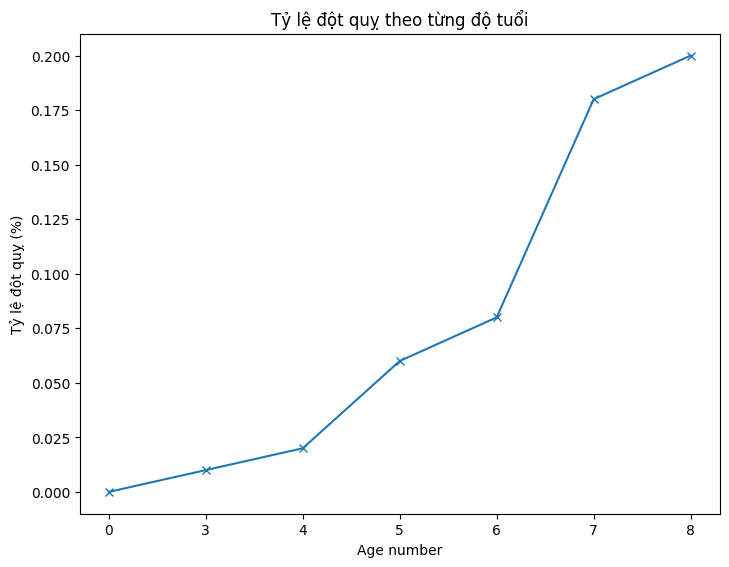

In [ ]:
filtered_data = age_pro[(age_pro['stroke'] == 1) & (age_pro['age_number'] != '1')]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(filtered_data['age_number'], filtered_data['proportion'], marker='x')
plt.xlabel('Age number')
plt.ylabel('Tỷ lệ đột quỵ (%)')
plt.title('Tỷ lệ đột quỵ theo từng độ tuổi')
plt.show()

## Smoking

In [ ]:
smoke = df.groupby(['smoking_status', 'stroke']).size().reset_index(name='count')
total_counts = df.groupby('smoking_status')['id'].count().reset_index(name='total_count')
smoke = smoke.merge(total_counts, on='smoking_status', how='left')
smoke['proportion'] = round((smoke['count'] / smoke['total_count']), 6)
smoke = smoke.set_index(['smoking_status', 'stroke'])
smoke

count  total_count  proportion
smoking_status  stroke                                
Unknown         0        1497         1544    0.969560
                1          47         1544    0.030440
formerly smoked 0         815          885    0.920904
                1          70          885    0.079096
never smoked    0        1802         1892    0.952431
                1          90         1892    0.047569
smokes          0         747          789    0.946768
                1          42          789    0.053232

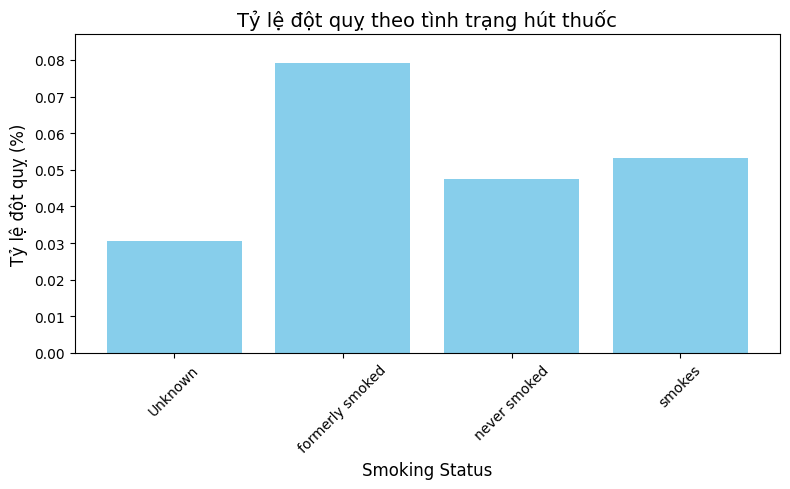

In [ ]:
stroke_data = smoke.reset_index()
stroke_data = stroke_data[stroke_data['stroke'] == 1]

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(stroke_data['smoking_status'], stroke_data['proportion'], color='skyblue')
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Tỷ lệ đột quỵ (%)', fontsize=12)
plt.title('Tỷ lệ đột quỵ theo tình trạng hút thuốc', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(0, max(stroke_data['proportion']) * 1.1)
plt.tight_layout()
plt.show()

## Relationship

In [ ]:
combined_data = df.groupby(['age_number', 'smoking_status', 'stroke']).size().reset_index(name='count')
total_counts = df.groupby(['age_number', 'smoking_status'])['id'].count().reset_index(name='total_count')
combined_data = combined_data.merge(total_counts, on=['age_number', 'smoking_status'], how='left')
combined_data['proportion'] = round(combined_data['count'] / combined_data['total_count'], 6)
combined_data = combined_data.set_index(['age_number', 'smoking_status', 'stroke'])
combined_data

count  total_count  proportion
age_number smoking_status  stroke                                
0          Unknown         0         496          497    0.997988
                           1           1          497    0.002012
           formerly smoked 0           4            4    1.000000
           never smoked    0           5            5    1.000000
           smokes          0           1            1    1.000000
...                                  ...          ...         ...
8          formerly smoked 1           5           31    0.161290
           never smoked    0          40           52    0.769231
                           1          12           52    0.230769
           smokes          0           8           11    0.727273
                           1           3           11    0.272727

[61 rows x 3 columns]

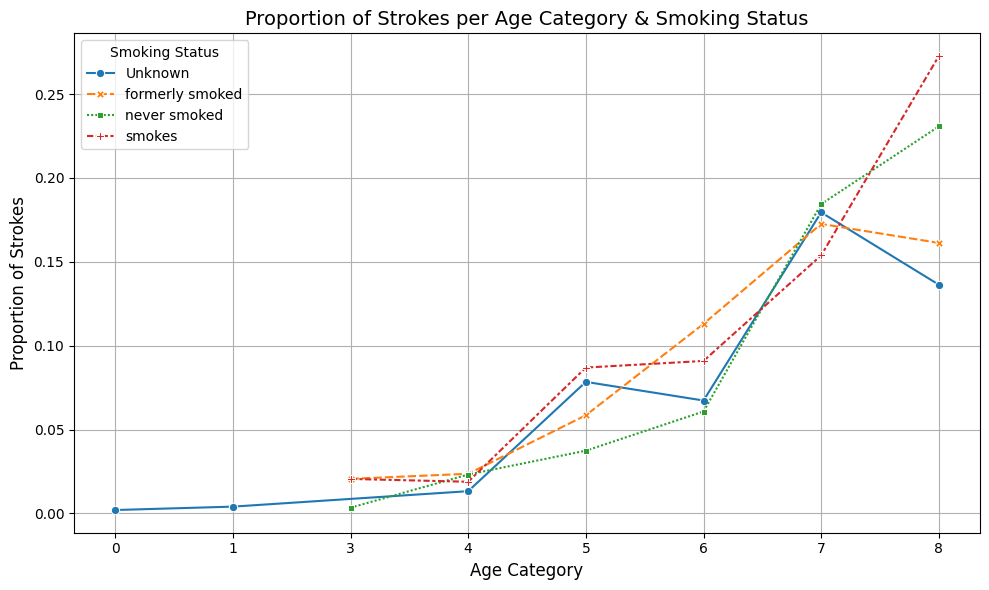

In [ ]:
combined_data = combined_data.reset_index()
stroke_data = combined_data[combined_data['stroke'] == 1]
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=stroke_data, x='age_number', y='proportion', hue='smoking_status', style='smoking_status', markers=True, ax=ax)
plt.title('Proportion of Strokes per Age Category & Smoking Status', fontsize=14)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Proportion of Strokes', fontsize=12)
plt.legend(title='Smoking Status', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


## BMI

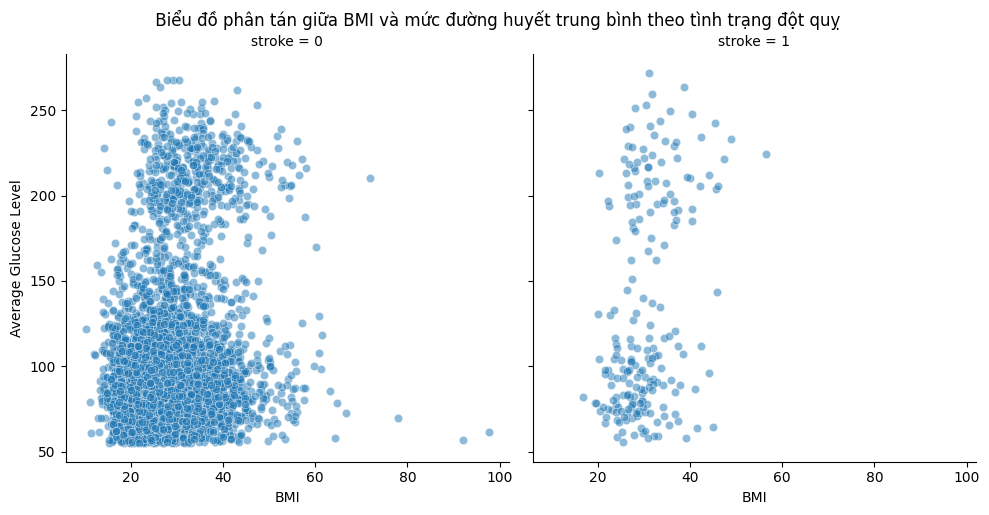

In [ ]:
g = sns.FacetGrid(df, col="stroke", height=5, aspect=1)
g.map(sns.scatterplot, 'bmi', 'avg_glucose_level', alpha=0.5)
g.fig.suptitle(' Biểu đồ phân tán giữa BMI và mức đường huyết trung bình theo tình trạng đột quỵ', y=1.02)
g.set_axis_labels("BMI", "Average Glucose Level")
plt.show()

## Gender

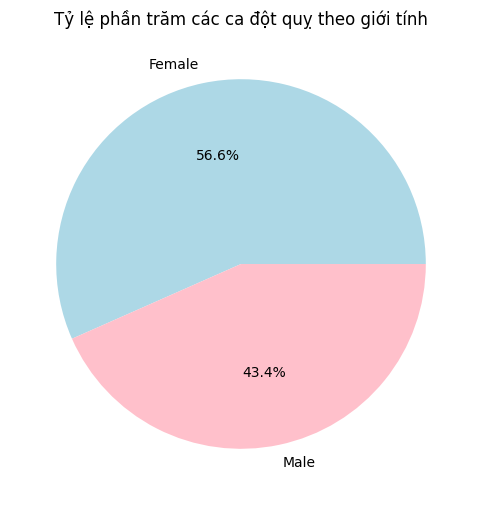

In [ ]:
stroke_by_gender = df[df['stroke'] == 1]['gender'].value_counts()
stroke_by_gender.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6), colors=['lightblue', 'pink'])
plt.title('Tỷ lệ phần trăm các ca đột quỵ theo giới tính')
plt.ylabel('')  
plt.show()

## Married

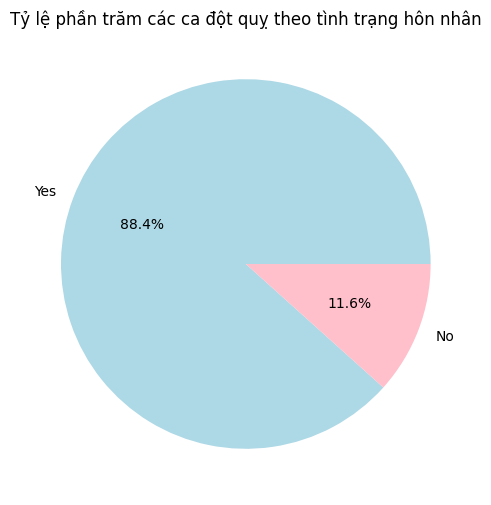

In [ ]:
stroke_by_married = df[df['stroke'] == 1]['ever_married'].value_counts()
stroke_by_married.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6), colors=['lightblue', 'pink'])
plt.title('Tỷ lệ phần trăm các ca đột quỵ theo tình trạng hôn nhân')
plt.ylabel('')  
plt.show()

# Data Preprocessing

In [ ]:
df = df.drop(['id', 'age_number'], axis=1, errors='ignore')
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             202.21   NaN     never smoked       1  
2             Rural             105.92  32.5     never smoked       1  
3             Urban             171.23  34.4           smokes       1  
4             Rural             174.12  24.0     never smoked       1  
...             ...                ...   ...              ...     ...  
5105          Urban              83.75   NaN     never smoked       0  
5106          Urban             125.20  40.0     never smoked       0  
5107          Rural              82.99  30.6     never smoked       0  
5108          Rural             166.29  25.6  formerly smoked       0  
5109          Urban              85.28  26.2          Unknown       0  

[5110 rows x 11 columns]

In [ ]:
df.drop(df[df['gender'] == 'Other'].index, inplace=True)
category_counts = df['gender'].value_counts()
category_counts

Female    2994
Male      2115
Name: gender, dtype: int64

In [ ]:
category_counts = df['ever_married'].value_counts()
category_counts

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [ ]:
category_counts = df['work_type'].value_counts()
category_counts

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
category_counts = df['Residence_type'].value_counts()
category_counts

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [ ]:
category_counts = df['smoking_status'].value_counts()
category_counts

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
def find_missing_groups(df, column):
    missing = df[column].isnull()  
    groups = []
    current_group = []
    
    for idx, is_missing in missing.items():
        if is_missing:
            current_group.append(idx)
        else:
            if current_group:
                groups.append(current_group)
                current_group = []
    
    if current_group:
        groups.append(current_group)
    
    return groups

missing_groups = find_missing_groups(df, 'bmi')
print("Các nhóm giá trị thiếu trong cột bmi:", missing_groups)

total_missing = sum(len(group) for group in missing_groups)
print("Tổng số giá trị bị thiếu:", total_missing)

Các nhóm giá trị thiếu trong cột bmi: [[1], [8], [13], [19], [27], [29], [43], [46], [50, 51], [54], [57], [64], [70], [78], [81], [84], [105], [112], [124], [126], [129], [133], [146], [150], [160, 161, 162], [167], [170, 171], [174], [178], [183], [189], [198], [200], [218], [227], [247], [342], [360], [432], [477], [479], [522], [668], [671], [680], [729], [742], [865], [867], [872], [879], [903], [936], [965], [1102], [1106], [1115], [1183], [1194], [1214], [1235], [1241], [1277], [1293], [1300], [1306], [1324], [1342], [1352], [1427], [1457], [1466], [1468], [1471], [1503], [1528], [1539], [1546], [1596], [1640], [1644], [1646], [1650], [1669, 1670], [1681], [1718, 1719], [1730], [1753], [1756], [1779], [1816], [1836, 1837], [1866], [1894], [1906], [1912], [1981], [1993], [2030], [2103], [2105], [2109], [2192], [2215], [2263], [2285], [2321, 2322], [2339], [2343], [2477], [2494], [2502], [2515], [2529], [2532], [2541], [2582], [2697], [2739], [2752], [2768], [2788], [2816], [2828]

In [ ]:
cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df = pd.get_dummies(df, columns=cols)

In [ ]:
print("Số giá trị missing ban đầu:", df['bmi'].isnull().sum())
df['bmi'] = df['bmi'].interpolate(method='linear')
print("Số giá trị missing sau khi nội suy:", df['bmi'].isnull().sum())

Số giá trị missing ban đầu: 201
Số giá trị missing sau khi nội suy: 0


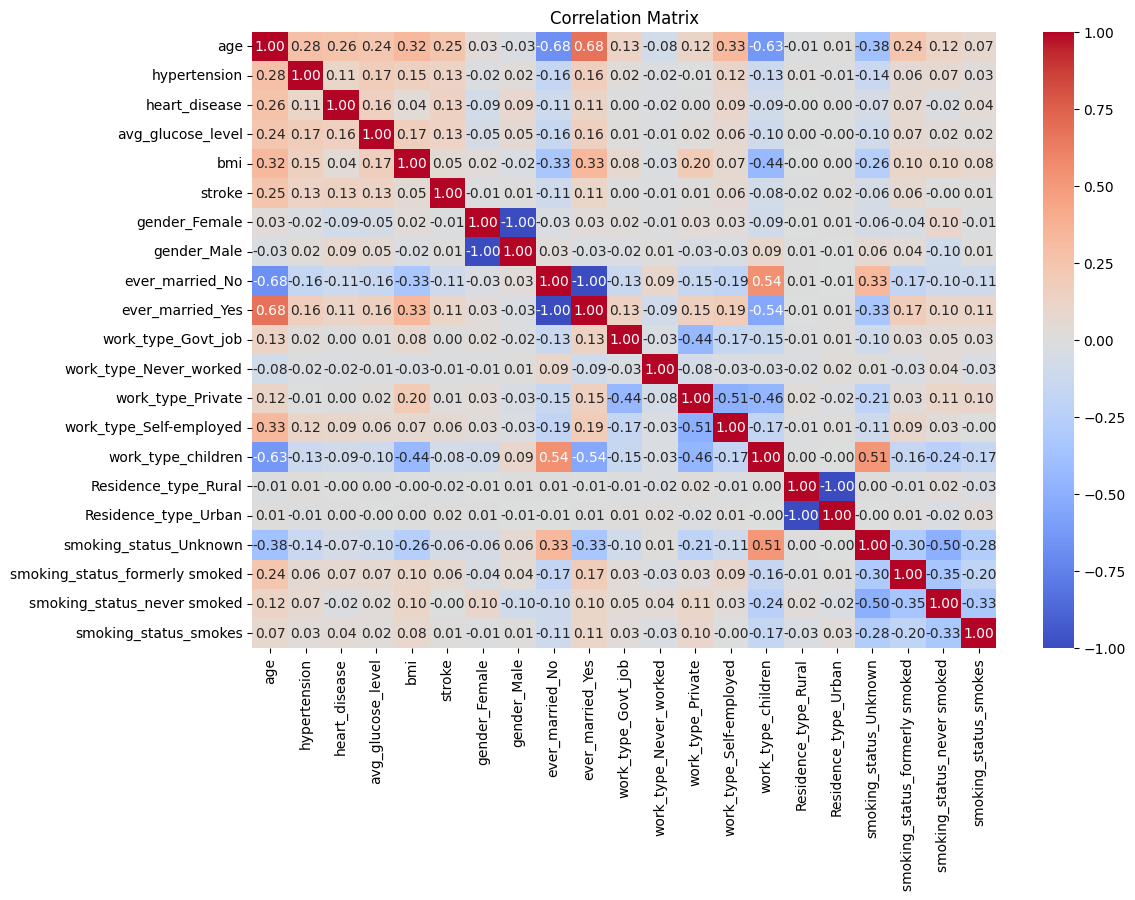

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Feature selection

In [ ]:
X = df.drop(["stroke"], axis=1)
y = df['stroke']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

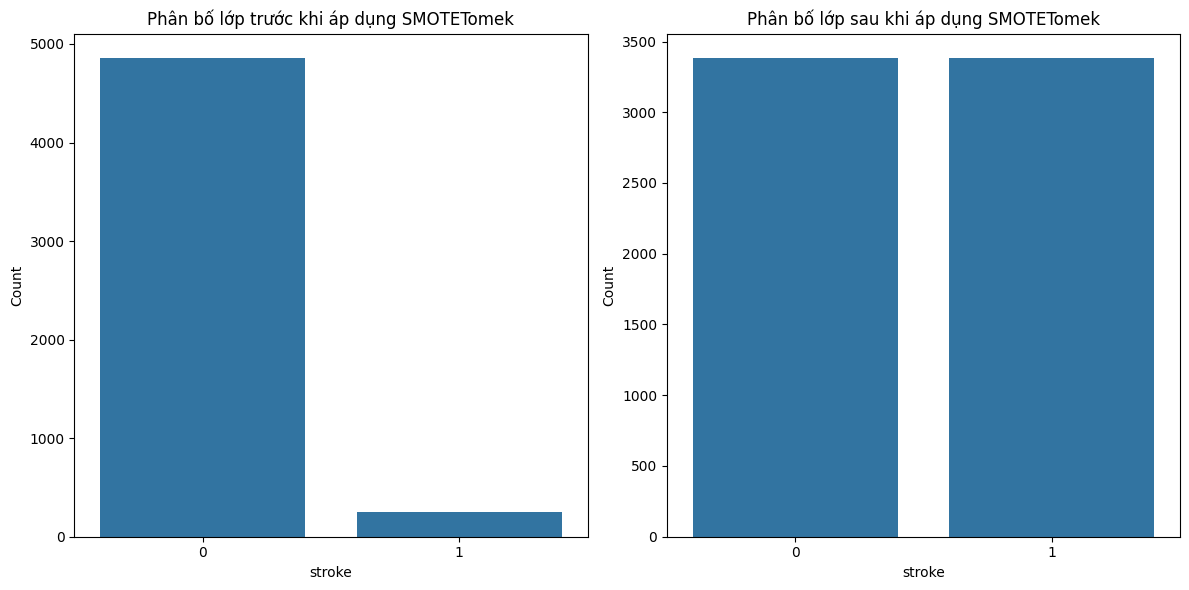

In [ ]:
smote = SMOTETomek(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x = y, ax=axes[0])
axes[0].set(title="Phân bố lớp trước khi áp dụng SMOTETomek", xlabel="stroke", ylabel="Count")

sns.countplot(x = y_train, ax=axes[1])
axes[1].set(title="Phân bố lớp sau khi áp dụng SMOTETomek", xlabel="stroke", ylabel="Count")

plt.tight_layout()
plt.show()

In [ ]:
import joblib
joblib.dump(X_train, 'X_train.pkl')
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_train, 'y_train.pkl')
joblib.dump(y_test, 'y_test.pkl')

['y_test.pkl']

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# joblib.dump(scaler, "scaler.pkl")

In [ ]:
print("Shape of x_train:", X_train.shape)
print("Shape of x_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (6770, 20)
Shape of x_test: (1533, 20)
Shape of y_train: (6770,)
Shape of y_test: (1533,)


## Train model ML

In [ ]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    auc = roc_auc_score(y_true, y_pred)

    table = PrettyTable()
    table.field_names = ["Metric", "Value"]
    table.add_row(["Accuracy", round(accuracy, 3)])
    table.add_row(["Precision", round(precision, 3)])
    table.add_row(["Recall", round(recall, 3)])
    table.add_row(["F1 Score", round(f1, 3)])
    table.add_row(["AUC", round(auc, 3)])
    
    return table

#### KNN

In [ ]:
knn = KNeighborsClassifier()

start_time = time.time()
knn.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.3f} seconds")
print("=" * 80)

y_train_pred = knn.predict(X_train)
train_table = evaluate_model(y_train, y_train_pred)

y_test_pred = knn.predict(X_test)
test_table = evaluate_model(y_test, y_test_pred)

table1_str = train_table.get_string(title="KNN Model - Training Metrics")
table2_str = test_table.get_string(title="KNN Model - Testing Metrics")

lines1 = table1_str.split('\n')
lines2 = table2_str.split('\n')

max_lines = max(len(lines1), len(lines2))
lines1 += [""] * (max_lines - len(lines1))
lines2 += [""] * (max_lines - len(lines2))

for l1, l2 in zip(lines1, lines2):
    print(f"{l1:<45} {l2}")
print("=" * 80)

cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print("KNN Model - Cross-Validation Scores:")
print(f"CV Mean Accuracy: {cv_scores.mean():.3f}")
print(f"CV Standard Deviation: {cv_scores.std():.3f}")
print("=" * 80)
print()

clf_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(clf_report)


Training time: 0.002 seconds
+------------------------------+              +-----------------------------+
| KNN Model - Training Metrics |              | KNN Model - Testing Metrics |
+------------------+-----------+              +-----------------+-----------+
|      Metric      |   Value   |              |      Metric     |   Value   |
+------------------+-----------+              +-----------------+-----------+
|     Accuracy     |   0.976   |              |     Accuracy    |   0.932   |
|    Precision     |   0.991   |              |    Precision    |   0.174   |
|      Recall      |   0.961   |              |      Recall     |   0.045   |
|     F1 Score     |   0.976   |              |     F1 Score    |   0.071   |
|       AUC        |   0.976   |              |       AUC       |   0.516   |
+------------------+-----------+              +-----------------+-----------+
KNN Model - Cross-Validation Scores:
CV Mean Accuracy: 0.967
CV Standard Deviation: 0.036

Classification Report:

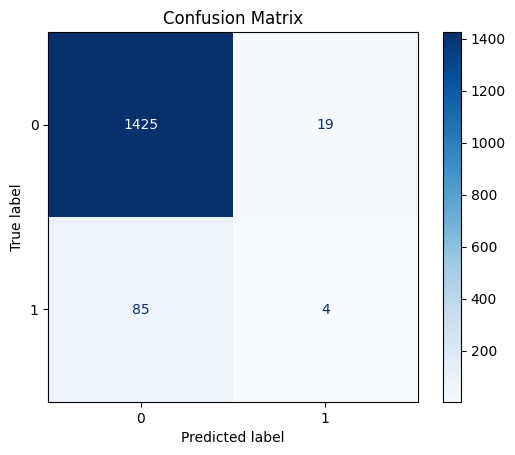

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, knn.predict(X_test)), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

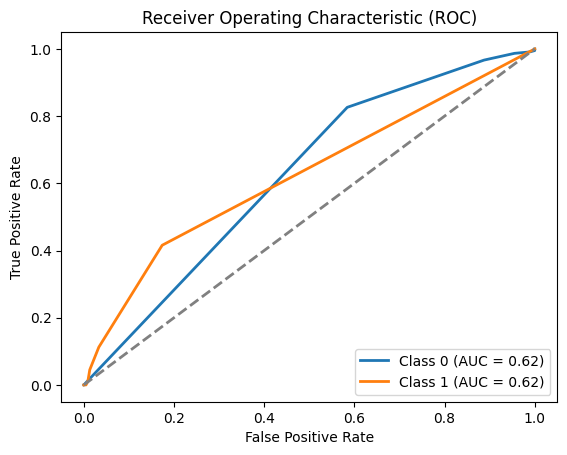

AUC: 0.62


In [ ]:
y_prob = knn.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob[:, 1])

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(knn.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(knn.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [ ]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40]
}

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for KNN:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in knn_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for KNN: {:.4f}".format(knn_grid_search.best_score_))

Best Hyperparameters for KNN:
+-------------+-----------+
|  Parameter  |   Value   |
+-------------+-----------+
|  algorithm  |    auto   |
|  leaf_size  |     10    |
|    metric   | manhattan |
| n_neighbors |     5     |
|      p      |     1     |
|   weights   |  distance |
+-------------+-----------+
Best Accuracy for KNN: 0.9704


In [ ]:
best_knn_model = KNeighborsClassifier(**knn_grid_search.best_params_)
best_knn_model.fit(X_train, y_train)
y_test_pred = best_knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
print("Best KNN Model - Testing Metrics:")

table_testing = PrettyTable()
table_testing.field_names = ["Metric", "Value"]
table_testing.add_row(["Accuracy", round(test_accuracy, 3)])
table_testing.add_row(["Precision", round(test_precision, 3)])
table_testing.add_row(["Recall", round(test_recall, 3)])
table_testing.add_row(["F1 Score", round(test_f1, 3)])
table_testing.add_row(["AUC", round(test_auc, 3)])
print(table_testing)

Best KNN Model - Testing Metrics:
+-----------+-------+
|   Metric  | Value |
+-----------+-------+
|  Accuracy | 0.933 |
| Precision | 0.217 |
|   Recall  | 0.056 |
|  F1 Score | 0.089 |
|    AUC    | 0.522 |
+-----------+-------+


In [ ]:
cv_scores = cross_val_score(best_knn_model, X_train, y_train, cv=5, scoring='accuracy')
print("Best KNN Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best KNN Model - Cross-Validation Scores:
CV Mean Accuracy: 0.9720
CV Standard Deviation: 0.0350


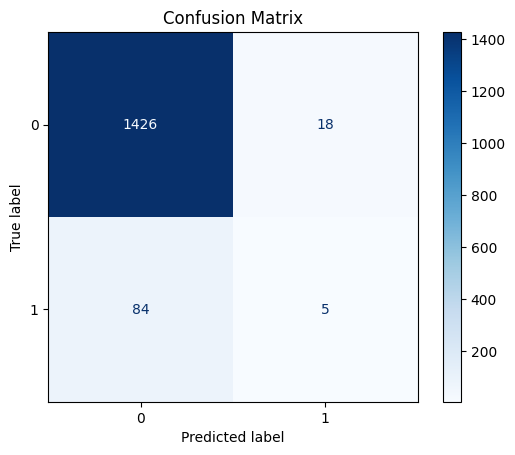

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#### LogisticRegression

In [ ]:
logis = LogisticRegression(class_weight='balanced', random_state=42)

start_time = time.time()
logis.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.3f} seconds")
print("=" * 80)

y_train_pred = logis.predict(X_train)
train_table = evaluate_model(y_train, y_train_pred)

y_test_pred = logis.predict(X_test)
test_table = evaluate_model(y_test, y_test_pred)

table1_str = train_table.get_string(title="Logistic Model - Training Metrics")
table2_str = test_table.get_string(title="Logistic Model - Testing Metrics")

lines1 = table1_str.split('\n')
lines2 = table2_str.split('\n')

max_lines = max(len(lines1), len(lines2))
lines1 += [""] * (max_lines - len(lines1))
lines2 += [""] * (max_lines - len(lines2))

for l1, l2 in zip(lines1, lines2):
    print(f"{l1:<45} {l2}")
print("=" * 80)

cv_scores = cross_val_score(logis, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Model - Cross-Validation Scores:")
print(f"CV Mean Accuracy: {cv_scores.mean():.3f}")
print(f"CV Standard Deviation: {cv_scores.std():.3f}")
print("=" * 80)
print()

clf_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(clf_report)


Training time: 0.018 seconds
+-----------------------------------+         +----------------------------------+
| Logistic Model - Training Metrics |         | Logistic Model - Testing Metrics |
+---------------------+-------------+         +--------------------+-------------+
|        Metric       |    Value    |         |       Metric       |    Value    |
+---------------------+-------------+         +--------------------+-------------+
|       Accuracy      |     0.96    |         |      Accuracy      |    0.942    |
|      Precision      |    0.998    |         |     Precision      |     0.5     |
|        Recall       |    0.922    |         |       Recall       |    0.045    |
|       F1 Score      |    0.959    |         |      F1 Score      |    0.082    |
|         AUC         |     0.96    |         |        AUC         |    0.521    |
+---------------------+-------------+         +--------------------+-------------+
Logistic Model - Cross-Validation Scores:
CV Mean Accuracy

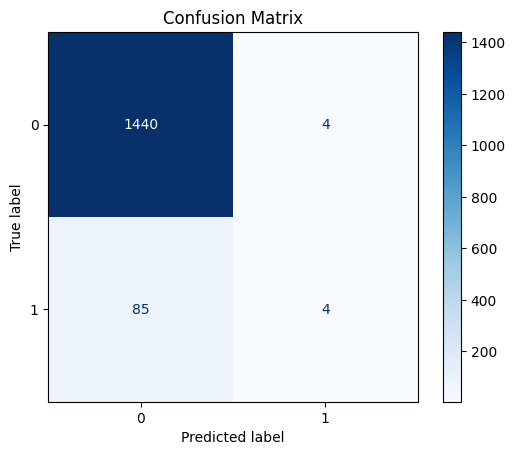

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, logis.predict(X_test)), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

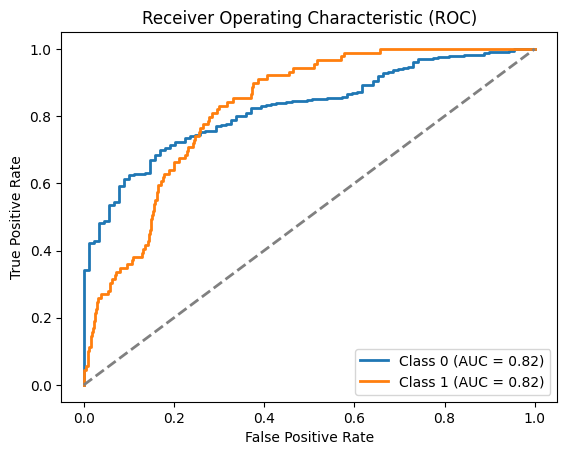

AUC: 0.82


In [ ]:
y_prob = logis.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob[:, 1])

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(logis.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(logis.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [ ]:
logis_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False],
    'l1_ratio': [None, 0.1, 0.5, 0.9]
}

logis_grid_search = GridSearchCV(logis, logis_param_grid, cv=5, scoring='f1', n_jobs=-1)
logis_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for Logistic:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in logis_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for Logistic: {:.4f}".format(logis_grid_search.best_score_))

Best Hyperparameters for Logistic:
+---------------+-------+
|   Parameter   | Value |
+---------------+-------+
|       C       |   1   |
|  class_weight |  None |
| fit_intercept |  True |
|    l1_ratio   |  None |
|    max_iter   |  100  |
|    penalty    |   l1  |
|     solver    |  saga |
+---------------+-------+
Best Accuracy for Logistic: 0.9551


In [ ]:
best_logis_model = LogisticRegression(**logis_grid_search.best_params_)
best_logis_model.fit(X_train, y_train)
y_test_pred = best_logis_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
print("Best Logistic Model - Testing Metrics:")

table_testing = PrettyTable()
table_testing.field_names = ["Metric", "Value"]
table_testing.add_row(["Accuracy", round(test_accuracy, 3)])
table_testing.add_row(["Precision", round(test_precision, 3)])
table_testing.add_row(["Recall", round(test_recall, 3)])
table_testing.add_row(["F1 Score", round(test_f1, 3)])
table_testing.add_row(["AUC", round(test_auc, 3)])
print(table_testing)

Best Logistic Model - Testing Metrics:
+-----------+-------+
|   Metric  | Value |
+-----------+-------+
|  Accuracy | 0.942 |
| Precision |  0.5  |
|   Recall  | 0.045 |
|  F1 Score | 0.082 |
|    AUC    | 0.521 |
+-----------+-------+


In [ ]:
cv_scores = cross_val_score(best_logis_model, X_train, y_train, cv=5, scoring='accuracy')
print("Best Logistic Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best Logistic Model - Cross-Validation Scores:
CV Mean Accuracy: 0.9590
CV Standard Deviation: 0.0430


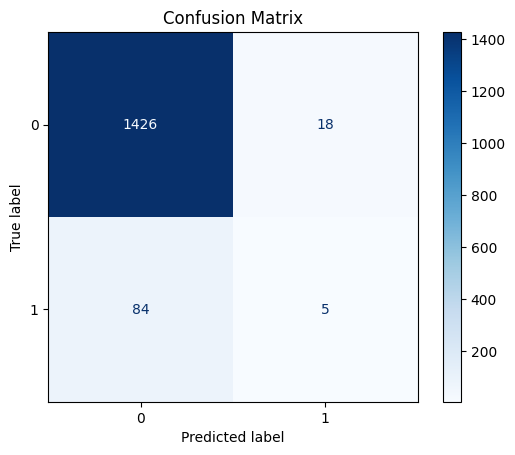

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#### DecisionTreeClassifier

In [ ]:
decision = DecisionTreeClassifier(class_weight='balanced', random_state=42)

start_time = time.time()
decision.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.3f} seconds")
print("=" * 80)

y_train_pred = decision.predict(X_train)
train_table = evaluate_model(y_train, y_train_pred)

y_test_pred = decision.predict(X_test)
test_table = evaluate_model(y_test, y_test_pred)

table1_str = train_table.get_string(title="DecisionTree Model - Training Metrics")
table2_str = test_table.get_string(title="DecisionTree Model - Testing Metrics")

lines1 = table1_str.split('\n')
lines2 = table2_str.split('\n')

max_lines = max(len(lines1), len(lines2))
lines1 += [""] * (max_lines - len(lines1))
lines2 += [""] * (max_lines - len(lines2))

for l1, l2 in zip(lines1, lines2):
    print(f"{l1:<45} {l2}")
print("=" * 80)

cv_scores = cross_val_score(decision, X_train, y_train, cv=5, scoring='accuracy')
print("DecisionTree Model - Cross-Validation Scores:")
print(f"CV Mean Accuracy: {cv_scores.mean():.3f}")
print(f"CV Standard Deviation: {cv_scores.std():.3f}")
print("=" * 80)
print()

clf_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(clf_report)


Training time: 0.021 seconds
+---------------------------------------+     +--------------------------------------+
| DecisionTree Model - Training Metrics |     | DecisionTree Model - Testing Metrics |
+-----------------------+---------------+     +-----------------------+--------------+
|         Metric        |     Value     |     |         Metric        |    Value     |
+-----------------------+---------------+     +-----------------------+--------------+
|        Accuracy       |      1.0      |     |        Accuracy       |    0.897     |
|       Precision       |      1.0      |     |       Precision       |    0.152     |
|         Recall        |      1.0      |     |         Recall        |    0.169     |
|        F1 Score       |      1.0      |     |        F1 Score       |     0.16     |
|          AUC          |      1.0      |     |          AUC          |    0.555     |
+-----------------------+---------------+     +-----------------------+--------------+
DecisionTree M

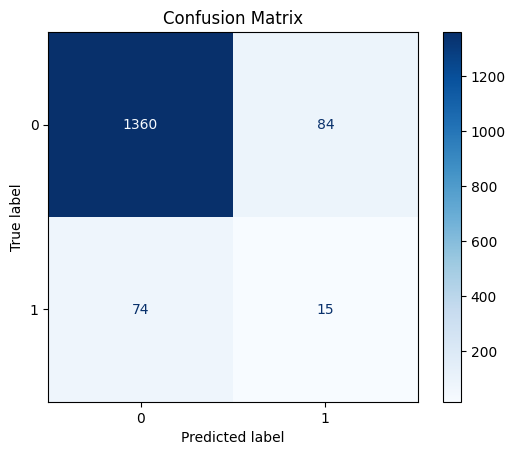

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, decision.predict(X_test)), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

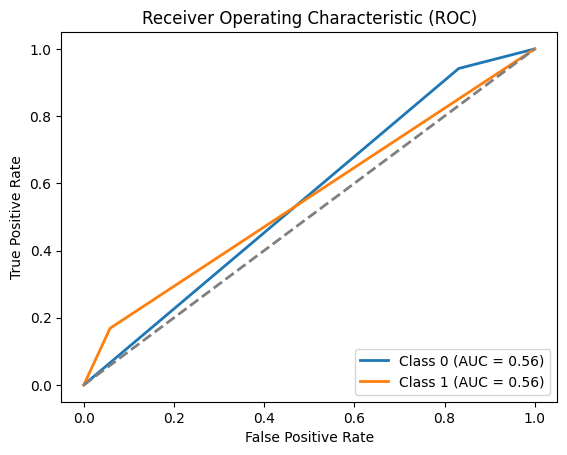

AUC: 0.56


In [ ]:
y_prob = decision.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob[:, 1])

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(decision.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(decision.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [ ]:
decision_param_grid = {
    'criterion': ['gini', 'entropy'],                
    'splitter': ['best', 'random'],                    
    'max_depth': [None, 3, 5, 10, 20],                 
    'min_samples_split': [2, 5, 10],                 
    'min_samples_leaf': [1, 2, 4],                   
    'max_features': [None, 'sqrt', 'log2'],         
    'class_weight': [None, 'balanced'],              
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],       
    'ccp_alpha': [0.0, 0.01, 0.1]                  
}

decision_grid_search = GridSearchCV(decision, decision_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
decision_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for DecisionTree:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in decision_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for DecisionTree: {:.4f}".format(decision_grid_search.best_score_))

Best Hyperparameters for DecisionTree:
+--------------------------+----------+
|        Parameter         |  Value   |
+--------------------------+----------+
|        ccp_alpha         |   0.0    |
|       class_weight       | balanced |
|        criterion         | entropy  |
|        max_depth         |   None   |
|       max_features       |   None   |
|     min_samples_leaf     |    1     |
|    min_samples_split     |    10    |
| min_weight_fraction_leaf |   0.0    |
|         splitter         |  random  |
+--------------------------+----------+
Best Accuracy for DecisionTree: 0.9654


In [ ]:
best_decision_model = DecisionTreeClassifier(**decision_grid_search.best_params_)
best_decision_model.fit(X_train, y_train)
y_test_pred = best_decision_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
print("Best DecisionTree Model - Testing Metrics:")

table_testing = PrettyTable()
table_testing.field_names = ["Metric", "Value"]
table_testing.add_row(["Accuracy", round(test_accuracy, 3)])
table_testing.add_row(["Precision", round(test_precision, 3)])
table_testing.add_row(["Recall", round(test_recall, 3)])
table_testing.add_row(["F1 Score", round(test_f1, 3)])
table_testing.add_row(["AUC", round(test_auc, 3)])
print(table_testing)

Best DecisionTree Model - Testing Metrics:
+-----------+-------+
|   Metric  | Value |
+-----------+-------+
|  Accuracy | 0.924 |
| Precision | 0.091 |
|   Recall  | 0.034 |
|  F1 Score | 0.049 |
|    AUC    | 0.506 |
+-----------+-------+


In [ ]:
cv_scores = cross_val_score(best_decision_model, X_train, y_train, cv=5, scoring='accuracy')
print("Best DecisionTree Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best DecisionTree Model - Cross-Validation Scores:
CV Mean Accuracy: 0.9600
CV Standard Deviation: 0.0360


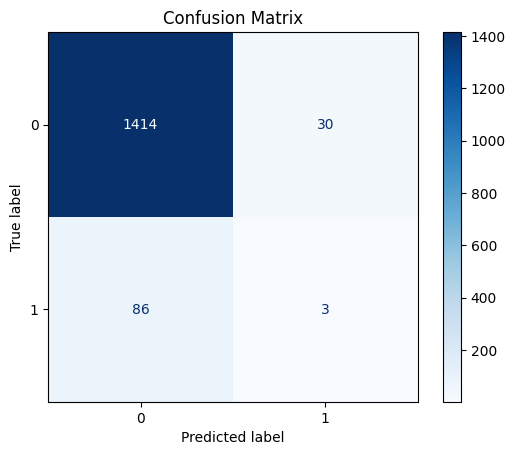

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#### RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

start_time = time.time()
rf.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.3f} seconds")
print("=" * 80)

y_train_pred = rf.predict(X_train)
train_table = evaluate_model(y_train, y_train_pred)

y_test_pred = rf.predict(X_test)
test_table = evaluate_model(y_test, y_test_pred)

table1_str = train_table.get_string(title="RandomForest Model - Training Metrics")
table2_str = test_table.get_string(title="RandomForest Model - Testing Metrics")

lines1 = table1_str.split('\n')
lines2 = table2_str.split('\n')

max_lines = max(len(lines1), len(lines2))
lines1 += [""] * (max_lines - len(lines1))
lines2 += [""] * (max_lines - len(lines2))

for l1, l2 in zip(lines1, lines2):
    print(f"{l1:<45} {l2}")
print("=" * 80)

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print("RandomForest Model - Cross-Validation Scores:")
print(f"CV Mean Accuracy: {cv_scores.mean():.3f}")
print(f"CV Standard Deviation: {cv_scores.std():.3f}")
print("=" * 80)
print()

clf_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(clf_report)


Training time: 0.518 seconds
+---------------------------------------+     +--------------------------------------+
| RandomForest Model - Training Metrics |     | RandomForest Model - Testing Metrics |
+-----------------------+---------------+     +-----------------------+--------------+
|         Metric        |     Value     |     |         Metric        |    Value     |
+-----------------------+---------------+     +-----------------------+--------------+
|        Accuracy       |      1.0      |     |        Accuracy       |    0.938     |
|       Precision       |      1.0      |     |       Precision       |     0.2      |
|         Recall        |      1.0      |     |         Recall        |    0.022     |
|        F1 Score       |      1.0      |     |        F1 Score       |     0.04     |
|          AUC          |      1.0      |     |          AUC          |    0.508     |
+-----------------------+---------------+     +-----------------------+--------------+
RandomForest M

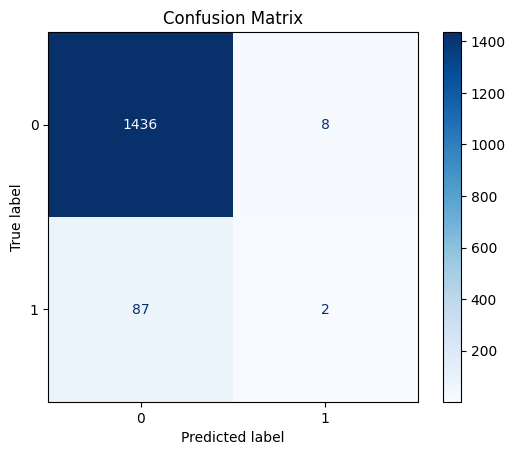

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, rf.predict(X_test)), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

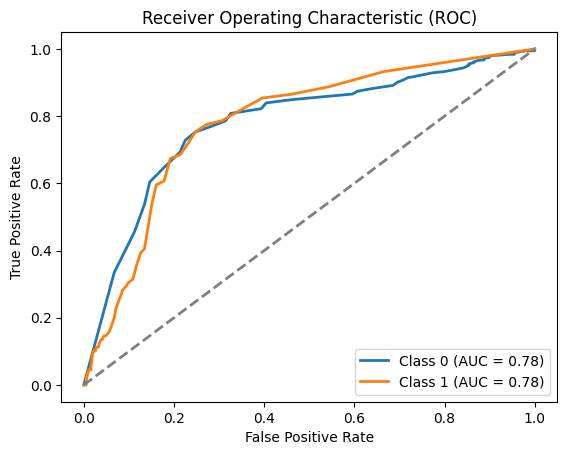

AUC: 0.78


In [ ]:
y_prob = rf.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob[:, 1])

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(rf.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(rf.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [ ]:
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],          
    'max_depth': [10, 20, 30, 50, None],         
    'min_samples_split': [2, 5, 10, 20],          
    'min_samples_leaf': [1, 2, 4, 8],   
    'criterion': ['gini', 'entropy', 'log_loss'],        
    'max_features': ['auto', 'sqrt', 'log2']
}


rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for RandomForest:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in rf_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for RandomForest: {:.4f}".format(rf_grid_search.best_score_))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4800 fits failed out of a total of 14400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2992 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

Best Hyperparameters for RandomForest:
+-------------------+---------+
|     Parameter     |  Value  |
+-------------------+---------+
|     criterion     | entropy |
|     max_depth     |    20   |
|    max_features   |   sqrt  |
|  min_samples_leaf |    1    |
| min_samples_split |    5    |
|    n_estimators   |   300   |
+-------------------+---------+
Best Accuracy for RandomForest: 0.9755


In [ ]:
best_rf_model = RandomForestClassifier(**rf_grid_search.best_params_)
best_rf_model.fit(X_train, y_train)
y_test_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
print("Best RandomForest Model - Testing Metrics:")

table_testing = PrettyTable()
table_testing.field_names = ["Metric", "Value"]
table_testing.add_row(["Accuracy", round(test_accuracy, 3)])
table_testing.add_row(["Precision", round(test_precision, 3)])
table_testing.add_row(["Recall", round(test_recall, 3)])
table_testing.add_row(["F1 Score", round(test_f1, 3)])
table_testing.add_row(["AUC", round(test_auc, 3)])
print(table_testing)

Best RandomForest Model - Testing Metrics:
+-----------+-------+
|   Metric  | Value |
+-----------+-------+
|  Accuracy |  0.94 |
| Precision |  0.2  |
|   Recall  | 0.011 |
|  F1 Score | 0.021 |
|    AUC    | 0.504 |
+-----------+-------+


In [ ]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Best RandomForest Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best RandomForest Model - Cross-Validation Scores:
CV Mean Accuracy: 0.9750
CV Standard Deviation: 0.0390


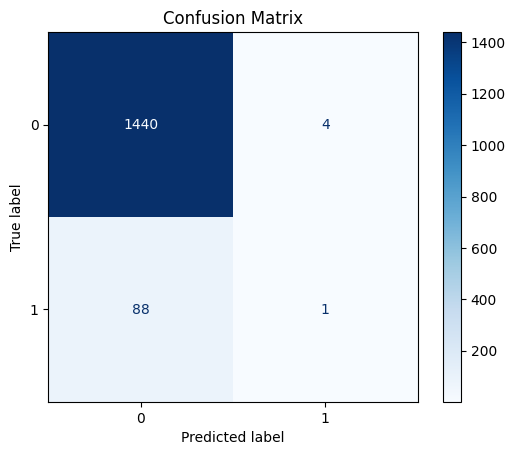

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#### SVM

In [ ]:
svm = SVC(probability=True)

start_time = time.time()
svm.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.3f} seconds")
print("=" * 80)

y_train_pred = svm.predict(X_train)
train_table = evaluate_model(y_train, y_train_pred)

y_test_pred = svm.predict(X_test)
test_table = evaluate_model(y_test, y_test_pred)

table1_str = train_table.get_string(title="SVC Model - Training Metrics")
table2_str = test_table.get_string(title="SVC Model - Testing Metrics")

lines1 = table1_str.split('\n')
lines2 = table2_str.split('\n')

max_lines = max(len(lines1), len(lines2))
lines1 += [""] * (max_lines - len(lines1))
lines2 += [""] * (max_lines - len(lines2))

for l1, l2 in zip(lines1, lines2):
    print(f"{l1:<45} {l2}")
print("=" * 80)

cv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
print("SVC Model - Cross-Validation Scores:")
print(f"CV Mean Accuracy: {cv_scores.mean():.3f}")
print(f"CV Standard Deviation: {cv_scores.std():.3f}")
print("=" * 80)
print()

clf_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(clf_report)


Training time: 1.076 seconds
+------------------------------+              +-----------------------------+
| SVC Model - Training Metrics |              | SVC Model - Testing Metrics |
+------------------+-----------+              +-----------------+-----------+
|      Metric      |   Value   |              |      Metric     |   Value   |
+------------------+-----------+              +-----------------+-----------+
|     Accuracy     |   0.968   |              |     Accuracy    |   0.938   |
|    Precision     |   0.997   |              |    Precision    |    0.25   |
|      Recall      |    0.94   |              |      Recall     |   0.034   |
|     F1 Score     |   0.967   |              |     F1 Score    |   0.059   |
|       AUC        |   0.968   |              |       AUC       |   0.514   |
+------------------+-----------+              +-----------------+-----------+
SVC Model - Cross-Validation Scores:
CV Mean Accuracy: 0.967
CV Standard Deviation: 0.044

Classification Report:

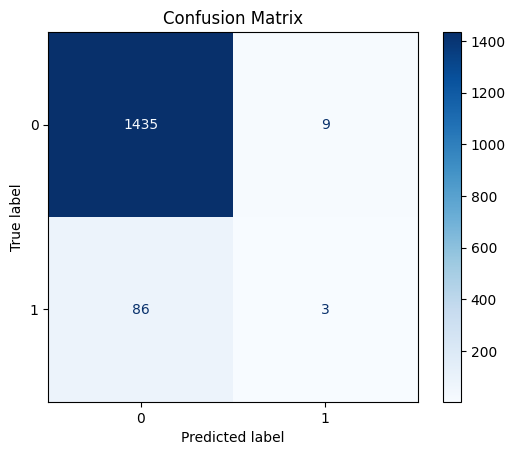

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, svm.predict(X_test)), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

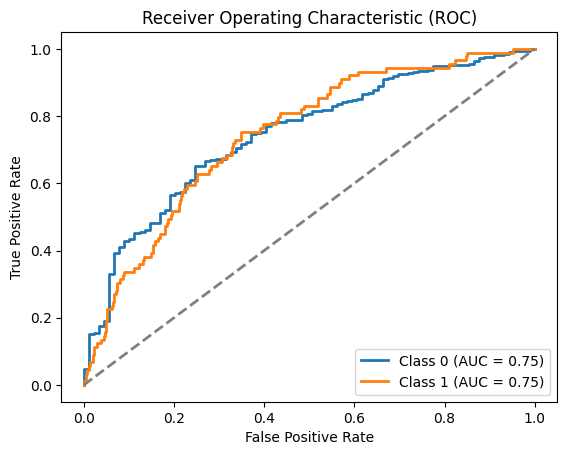

AUC: 0.75


In [ ]:
y_prob = svm.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob[:, 1])

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(svm.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(svm.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [ ]:
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

svm_grid_search = GridSearchCV(svm, svc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

print("Best Hyperparameters for SVC:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in svm_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
    
print(table_hyperparams)
print("Best Accuracy for SVC: {:.4f}".format(svm_grid_search.best_score_))

Best Hyperparameters for SVC:
+-----------+-------+
| Parameter | Value |
+-----------+-------+
|     C     |   1   |
|   gamma   |   1   |
|   kernel  |  rbf  |
+-----------+-------+
Best Accuracy for SVC: 0.9703


In [ ]:
best_svm_model = SVC(**svm_grid_search.best_params_, probability=True)
best_svm_model.fit(X_train, y_train)
y_test_pred = best_svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
print("Best SVC Model - Testing Metrics:")

table_testing = PrettyTable()
table_testing.field_names = ["Metric", "Value"]
table_testing.add_row(["Accuracy", round(test_accuracy, 3)])
table_testing.add_row(["Precision", round(test_precision, 3)])
table_testing.add_row(["Recall", round(test_recall, 3)])
table_testing.add_row(["F1 Score", round(test_f1, 3)])
table_testing.add_row(["AUC", round(test_auc, 3)])
print(table_testing)

Best SVC Model - Testing Metrics:
+-----------+-------+
|   Metric  | Value |
+-----------+-------+
|  Accuracy | 0.933 |
| Precision | 0.111 |
|   Recall  | 0.022 |
|  F1 Score | 0.037 |
|    AUC    | 0.506 |
+-----------+-------+


In [ ]:
cv_scores = cross_val_score(best_svm_model, X_train, y_train, cv=5, scoring='accuracy')
print("Best SVC Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best SVC Model - Cross-Validation Scores:
CV Mean Accuracy: 0.9700
CV Standard Deviation: 0.0410


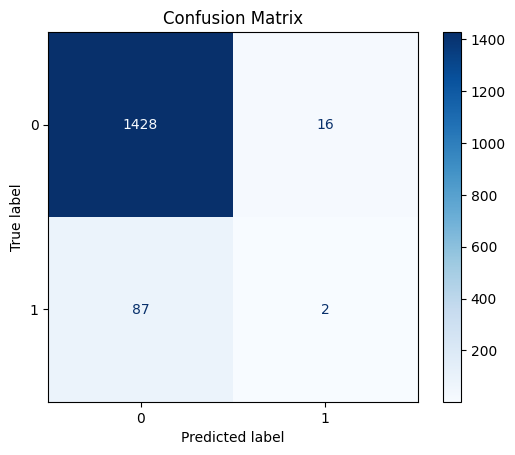

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#### LGBMClassifier

In [ ]:
lgbm = LGBMClassifier()

start_time = time.time()
lgbm.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.3f} seconds")
print("=" * 80)

y_train_pred = lgbm.predict(X_train)
train_table = evaluate_model(y_train, y_train_pred)

y_test_pred = lgbm.predict(X_test)
test_table = evaluate_model(y_test, y_test_pred)

table1_str = train_table.get_string(title="LGBM Model - Training Metrics")
table2_str = test_table.get_string(title="LGBM Model - Testing Metrics")

lines1 = table1_str.split('\n')
lines2 = table2_str.split('\n')

max_lines = max(len(lines1), len(lines2))
lines1 += [""] * (max_lines - len(lines1))
lines2 += [""] * (max_lines - len(lines2))

for l1, l2 in zip(lines1, lines2):
    print(f"{l1:<45} {l2}")
print("=" * 80)

cv_scores = cross_val_score(lgbm, X_train, y_train, cv=5, scoring='accuracy')
print("LGBM Model - Cross-Validation Scores:")
print(f"CV Mean Accuracy: {cv_scores.mean():.3f}")
print(f"CV Standard Deviation: {cv_scores.std():.3f}")
print("=" * 80)
print()

clf_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(clf_report)


[LightGBM] [Info] Number of positive: 3385, number of negative: 3385
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 6770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training time: 0.122 seconds
+-------------------------------+             +------------------------------+
| LGBM Model - Training Metrics |             | LGBM Model - Testing Metrics |
+------------------+------------+             +------------------+-----------+
|      Metric      |   Value    |             |      Metric      |   Value   |
+------------------+------------+             +------------------+-----------+
|     Accuracy     |   0.996    |             |     Accuracy     |   0.936   

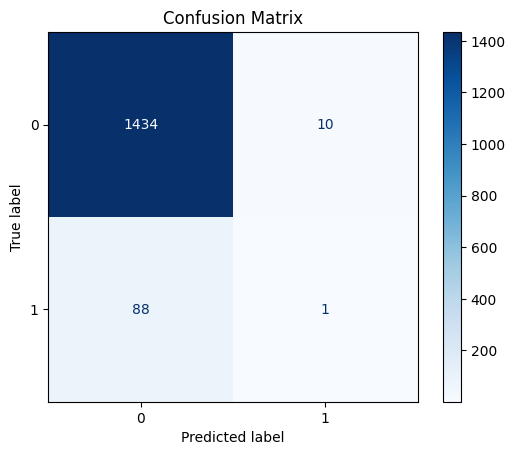

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, lgbm.predict(X_test)), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

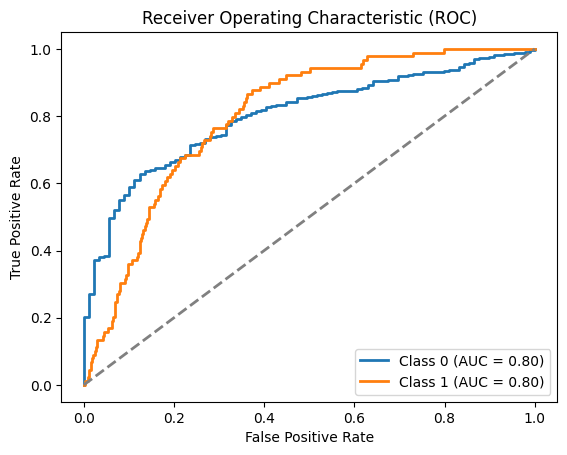

AUC: 0.80


In [ ]:
y_prob = lgbm.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob[:, 1])

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(lgbm.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(lgbm.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [ ]:
lgbm_param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'min_child_samples': [20, 30] 
}

lgbm_grid_search = GridSearchCV(lgbm, lgbm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lgbm_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for LGBM:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in lgbm_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for LGBM: {:.4f}".format(lgbm_grid_search.best_score_))

[LightGBM] [Info] Number of positive: 3385, number of negative: 3385
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 6770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Hyperparameters for LGBM:
+-------------------+-------+
|     Parameter     | Value |
+-------------------+-------+
|   learning_rate   |  0.05 |
|     max_depth     |   10  |
| min_child_samples |   20  |
|    n_estimators   |  200  |
|     num_leaves    |   31  |
+-------------------+-------+
Best Accuracy for LGBM: 0.9719


In [ ]:
best_lgbm_model = LGBMClassifier(**lgbm_grid_search.best_params_)
best_lgbm_model.fit(X_train, y_train)
y_test_pred = best_lgbm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
print("Best LGBM Model - Testing Metrics:")

table_testing = PrettyTable()
table_testing.field_names = ["Metric", "Value"]
table_testing.add_row(["Accuracy", round(test_accuracy, 3)])
table_testing.add_row(["Precision", round(test_precision, 3)])
table_testing.add_row(["Recall", round(test_recall, 3)])
table_testing.add_row(["F1 Score", round(test_f1, 3)])
table_testing.add_row(["AUC", round(test_auc, 3)])
print(table_testing)

[LightGBM] [Info] Number of positive: 3385, number of negative: 3385
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 6770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best LGBM Model - Testing Metrics:
+-----------+-------+
|   Metric  | Value |
+-----------+-------+
|  Accuracy | 0.933 |
| Precision | 0.118 |
|   Recall  | 0.022 |
|  F1 Score | 0.038 |
|    AUC    | 0.506 |
+-----------+-------+


In [ ]:
cv_scores = cross_val_score(best_lgbm_model, X_train, y_train, cv=5, scoring='accuracy')
print("Best LGBM Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

[LightGBM] [Info] Number of positive: 2708, number of negative: 2708
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 5416, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 2708, number of negative: 2708
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 5416, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[L

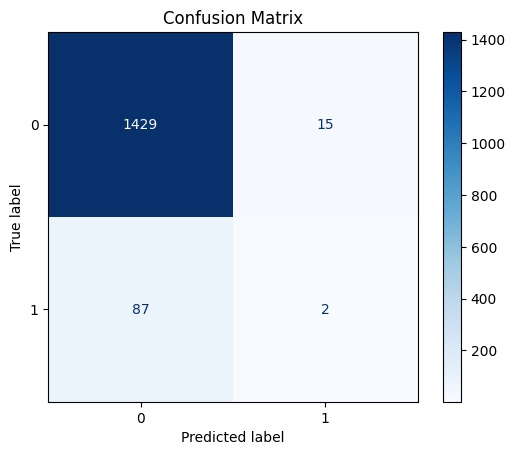

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#### XGBClassifier

In [ ]:
xgb = XGBClassifier()

start_time = time.time()
xgb.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.3f} seconds")
print("=" * 80)

y_train_pred = xgb.predict(X_train)
train_table = evaluate_model(y_train, y_train_pred)

y_test_pred = xgb.predict(X_test)
test_table = evaluate_model(y_test, y_test_pred)

table1_str = train_table.get_string(title="XGBClassifier Model - Training Metrics")
table2_str = test_table.get_string(title="XGBClassifier Model - Testing Metrics")

lines1 = table1_str.split('\n')
lines2 = table2_str.split('\n')

max_lines = max(len(lines1), len(lines2))
lines1 += [""] * (max_lines - len(lines1))
lines2 += [""] * (max_lines - len(lines2))

for l1, l2 in zip(lines1, lines2):
    print(f"{l1:<45} {l2}")
print("=" * 80)

cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
print("XGBClassifier Model - Cross-Validation Scores:")
print(f"CV Mean Accuracy: {cv_scores.mean():.3f}")
print(f"CV Standard Deviation: {cv_scores.std():.3f}")
print("=" * 80)
print()

clf_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(clf_report)


Training time: 0.554 seconds
+----------------------------------------+    +---------------------------------------+
| XGBClassifier Model - Training Metrics |    | XGBClassifier Model - Testing Metrics |
+------------------------+---------------+    +-----------------------+---------------+
|         Metric         |     Value     |    |         Metric        |     Value     |
+------------------------+---------------+    +-----------------------+---------------+
|        Accuracy        |      1.0      |    |        Accuracy       |     0.933     |
|       Precision        |      1.0      |    |       Precision       |      0.15     |
|         Recall         |      1.0      |    |         Recall        |     0.034     |
|        F1 Score        |      1.0      |    |        F1 Score       |     0.055     |
|          AUC           |      1.0      |    |          AUC          |     0.511     |
+------------------------+---------------+    +-----------------------+---------------+
XGB

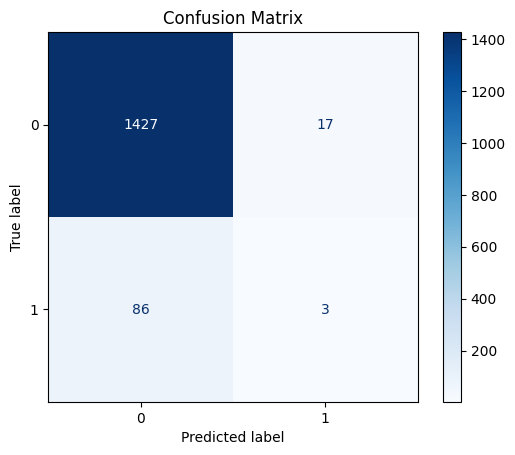

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, xgb.predict(X_test)), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

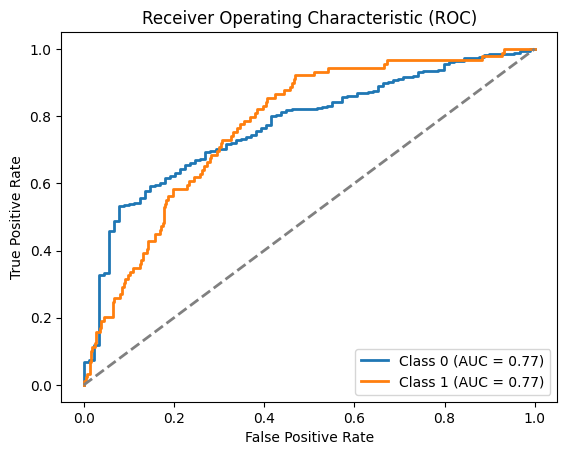

AUC: 0.77


In [ ]:
y_prob = xgb.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob[:, 1])

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(xgb.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(xgb.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [ ]:
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 7],           
    'n_estimators': [100, 200, 300], 
    'subsample': [0.8, 1.0],          
    'colsample_bytree': [0.8, 1.0],    
    'gamma': [0, 0.1, 1],             
    'min_child_weight': [1, 5]           
}

xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for XGBClassifier:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in xgb_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for XGBClassifier: {:.4f}".format(xgb_grid_search.best_score_))

Best Hyperparameters for XGBClassifier:
+------------------+-------+
|    Parameter     | Value |
+------------------+-------+
| colsample_bytree |  0.8  |
|      gamma       |   0   |
|  learning_rate   |  0.1  |
|    max_depth     |   7   |
| min_child_weight |   1   |
|   n_estimators   |  100  |
|    subsample     |  1.0  |
+------------------+-------+
Best Accuracy for XGBClassifier: 0.9733


In [ ]:
best_xgb_model = XGBClassifier(**xgb_grid_search.best_params_)
best_xgb_model.fit(X_train, y_train)
y_test_pred = best_xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
print("Best XGBClassifier Model - Testing Metrics:")

table_testing = PrettyTable()
table_testing.field_names = ["Metric", "Value"]
table_testing.add_row(["Accuracy", round(test_accuracy, 3)])
table_testing.add_row(["Precision", round(test_precision, 3)])
table_testing.add_row(["Recall", round(test_recall, 3)])
table_testing.add_row(["F1 Score", round(test_f1, 3)])
table_testing.add_row(["AUC", round(test_auc, 3)])
print(table_testing)

Best XGBClassifier Model - Testing Metrics:
+-----------+-------+
|   Metric  | Value |
+-----------+-------+
|  Accuracy | 0.934 |
| Precision |  0.25 |
|   Recall  | 0.067 |
|  F1 Score | 0.106 |
|    AUC    | 0.527 |
+-----------+-------+


In [ ]:
cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Best XGBClassifier Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best XGBClassifier Model - Cross-Validation Scores:
CV Mean Accuracy: 0.9730
CV Standard Deviation: 0.0400


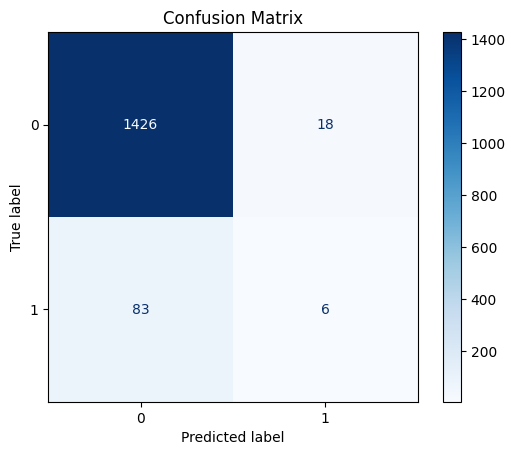

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#### GradientBoostingClassifier

In [ ]:
gradient = GradientBoostingClassifier()

start_time = time.time()
gradient.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.3f} seconds")
print("=" * 80)

y_train_pred = gradient.predict(X_train)
train_table = evaluate_model(y_train, y_train_pred)

y_test_pred = gradient.predict(X_test)
test_table = evaluate_model(y_test, y_test_pred)

table1_str = train_table.get_string(title="GradientBoosting Model - Training Metrics")
table2_str = test_table.get_string(title="GradientBoosting Model - Testing Metrics")

lines1 = table1_str.split('\n')
lines2 = table2_str.split('\n')

max_lines = max(len(lines1), len(lines2))
lines1 += [""] * (max_lines - len(lines1))
lines2 += [""] * (max_lines - len(lines2))

for l1, l2 in zip(lines1, lines2):
    print(f"{l1:<45} {l2}")
print("=" * 80)

cv_scores = cross_val_score(gradient, X_train, y_train, cv=5, scoring='accuracy')
print("GradientBoosting Model - Cross-Validation Scores:")
print(f"CV Mean Accuracy: {cv_scores.mean():.3f}")
print(f"CV Standard Deviation: {cv_scores.std():.3f}")
print("=" * 80)
print()

clf_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(clf_report)


Training time: 0.951 seconds
+-------------------------------------------+ +------------------------------------------+
| GradientBoosting Model - Training Metrics | | GradientBoosting Model - Testing Metrics |
+--------------------------+----------------+ +-------------------------+----------------+
|          Metric          |     Value      | |          Metric         |     Value      |
+--------------------------+----------------+ +-------------------------+----------------+
|         Accuracy         |     0.969      | |         Accuracy        |     0.936      |
|        Precision         |     0.995      | |        Precision        |     0.235      |
|          Recall          |     0.944      | |          Recall         |     0.045      |
|         F1 Score         |     0.968      | |         F1 Score        |     0.075      |
|           AUC            |     0.969      | |           AUC           |     0.518      |
+--------------------------+----------------+ +--------------

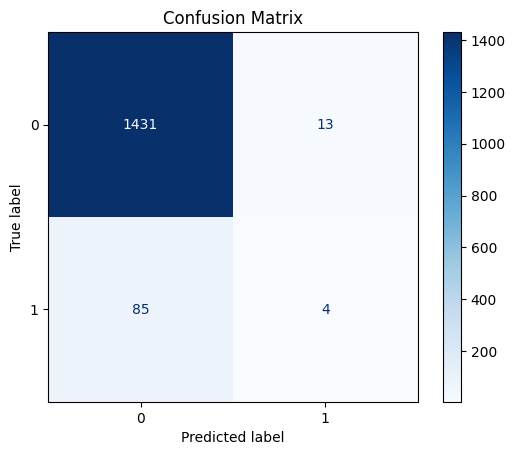

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, gradient.predict(X_test)), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

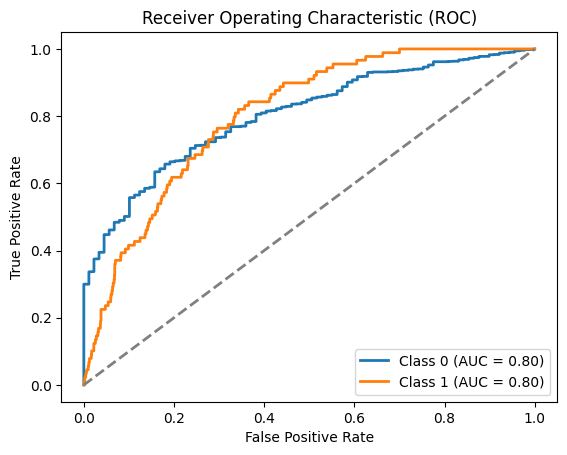

AUC: 0.80


In [ ]:
y_prob = gradient.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob[:, 1])

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(gradient.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(gradient.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [ ]:
gradient_param_grid = {
    'n_estimators': [100, 200, 300],        
    'learning_rate': [0.01, 0.1, 0.2],     
    'max_depth': [3, 4, 5],              
    'min_samples_split': [2, 3, 4],       
    'min_samples_leaf': [1, 2, 3]
}

gradient_grid_search = GridSearchCV(gradient, gradient_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gradient_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for GradientBoosting:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in gradient_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for GradientBoosting: {:.4f}".format(gradient_grid_search.best_score_))

Best Hyperparameters for GradientBoosting:
+-------------------+-------+
|     Parameter     | Value |
+-------------------+-------+
|   learning_rate   |  0.1  |
|     max_depth     |   5   |
|  min_samples_leaf |   1   |
| min_samples_split |   3   |
|    n_estimators   |  200  |
+-------------------+-------+
Best Accuracy for GradientBoosting: 0.9710


In [ ]:
best_gradient_model = GradientBoostingClassifier(**gradient_grid_search.best_params_)
best_gradient_model.fit(X_train, y_train)
y_test_pred = best_gradient_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
print("Best GradientBoosting Model - Testing Metrics:")

table_testing = PrettyTable()
table_testing.field_names = ["Metric", "Value"]
table_testing.add_row(["Accuracy", round(test_accuracy, 3)])
table_testing.add_row(["Precision", round(test_precision, 3)])
table_testing.add_row(["Recall", round(test_recall, 3)])
table_testing.add_row(["F1 Score", round(test_f1, 3)])
table_testing.add_row(["AUC", round(test_auc, 3)])
print(table_testing)

Best GradientBoosting Model - Testing Metrics:
+-----------+-------+
|   Metric  | Value |
+-----------+-------+
|  Accuracy | 0.937 |
| Precision | 0.278 |
|   Recall  | 0.056 |
|  F1 Score | 0.093 |
|    AUC    | 0.524 |
+-----------+-------+


In [ ]:
cv_scores = cross_val_score(best_gradient_model, X_train, y_train, cv=5, scoring='accuracy')
print("Best GradientBoosting Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best GradientBoosting Model - Cross-Validation Scores:
CV Mean Accuracy: 0.9710
CV Standard Deviation: 0.0380


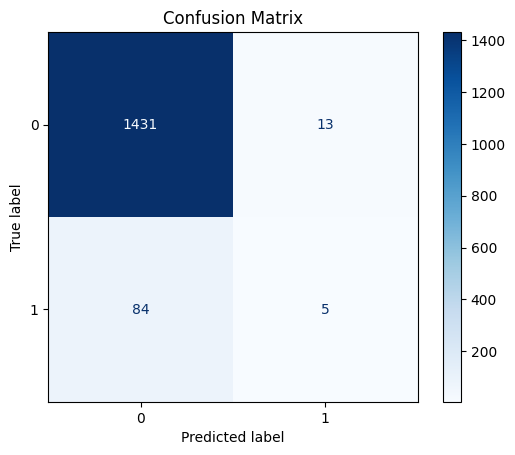

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#### CatBoostClassifier

In [ ]:
cat = CatBoostClassifier()

start_time = time.time()
cat.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.3f} seconds")
print("=" * 80)

y_train_pred = cat.predict(X_train)
train_table = evaluate_model(y_train, y_train_pred)

y_test_pred = cat.predict(X_test)
test_table = evaluate_model(y_test, y_test_pred)

table1_str = train_table.get_string(title="CatBoost Model - Training Metrics")
table2_str = test_table.get_string(title="CatBoost Model - Testing Metrics")

lines1 = table1_str.split('\n')
lines2 = table2_str.split('\n')

max_lines = max(len(lines1), len(lines2))
lines1 += [""] * (max_lines - len(lines1))
lines2 += [""] * (max_lines - len(lines2))

for l1, l2 in zip(lines1, lines2):
    print(f"{l1:<45} {l2}")
print("=" * 80)

cv_scores = cross_val_score(cat, X_train, y_train, cv=5, scoring='accuracy')
print("CatBoost Model - Cross-Validation Scores:")
print(f"CV Mean Accuracy: {cv_scores.mean():.3f}")
print(f"CV Standard Deviation: {cv_scores.std():.3f}")
print("=" * 80)
print()

clf_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(clf_report)


Learning rate set to 0.023313
0:	learn: 0.6586237	total: 159ms	remaining: 2m 38s
1:	learn: 0.6281450	total: 179ms	remaining: 1m 29s
2:	learn: 0.5913113	total: 191ms	remaining: 1m 3s
3:	learn: 0.5568672	total: 201ms	remaining: 50s
4:	learn: 0.5330850	total: 208ms	remaining: 41.3s
5:	learn: 0.5048338	total: 215ms	remaining: 35.6s
6:	learn: 0.4795497	total: 219ms	remaining: 31s
7:	learn: 0.4634142	total: 228ms	remaining: 28.3s
8:	learn: 0.4449630	total: 231ms	remaining: 25.5s
9:	learn: 0.4355034	total: 234ms	remaining: 23.2s
10:	learn: 0.4179195	total: 240ms	remaining: 21.5s
11:	learn: 0.3987712	total: 245ms	remaining: 20.2s
12:	learn: 0.3815563	total: 248ms	remaining: 18.8s
13:	learn: 0.3710957	total: 251ms	remaining: 17.7s
14:	learn: 0.3590155	total: 253ms	remaining: 16.6s
15:	learn: 0.3526104	total: 256ms	remaining: 15.7s
16:	learn: 0.3429925	total: 259ms	remaining: 15s
17:	learn: 0.3336258	total: 261ms	remaining: 14.2s
18:	learn: 0.3249202	total: 264ms	remaining: 13.6s
19:	learn: 0.31

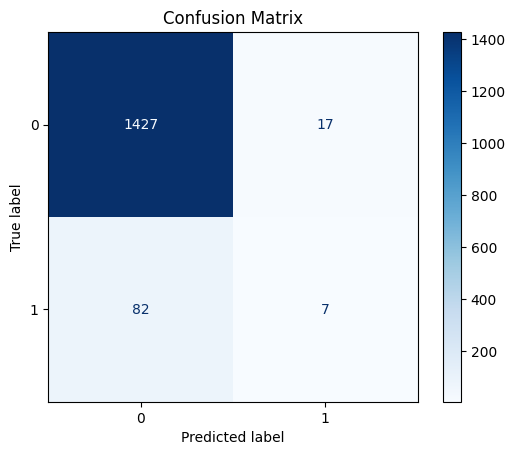

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, cat.predict(X_test)), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

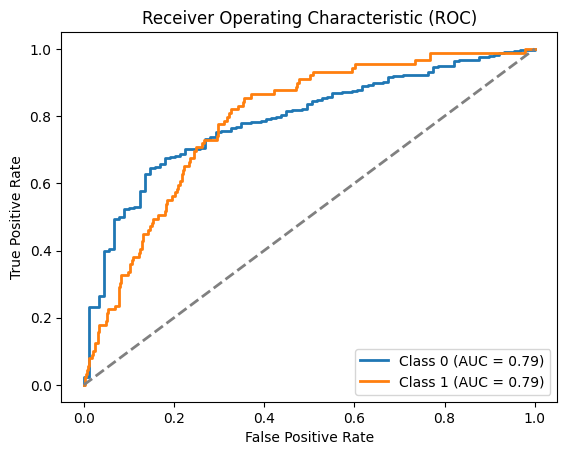

AUC: 0.79


In [ ]:
y_prob = cat.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob[:, 1])

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(cat.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(cat.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [ ]:
cat_param_grid = {
    'learning_rate': [0.01, 0.03, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [100, 200, 300]
}

cat_grid_search = GridSearchCV(cat, cat_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
cat_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for CatBoost:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in cat_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for CatBoost: {:.4f}".format(cat_grid_search.best_score_))

0:	learn: 0.6249861	total: 4.44ms	remaining: 884ms
1:	learn: 0.5859397	total: 9.62ms	remaining: 953ms
2:	learn: 0.5436326	total: 14.5ms	remaining: 950ms
3:	learn: 0.5017750	total: 19.5ms	remaining: 955ms
4:	learn: 0.4756945	total: 25.4ms	remaining: 991ms
5:	learn: 0.4407662	total: 31.2ms	remaining: 1.01s
6:	learn: 0.4161421	total: 36.8ms	remaining: 1.01s
7:	learn: 0.3883000	total: 42.2ms	remaining: 1.01s
8:	learn: 0.3585659	total: 47.9ms	remaining: 1.01s
9:	learn: 0.3373506	total: 53.6ms	remaining: 1.02s
10:	learn: 0.3223723	total: 59.5ms	remaining: 1.02s
11:	learn: 0.3033354	total: 65.8ms	remaining: 1.03s
12:	learn: 0.2870536	total: 71.9ms	remaining: 1.03s
13:	learn: 0.2752637	total: 78.2ms	remaining: 1.04s
14:	learn: 0.2592085	total: 84ms	remaining: 1.03s
15:	learn: 0.2483368	total: 90ms	remaining: 1.03s
16:	learn: 0.2357944	total: 95.7ms	remaining: 1.03s
17:	learn: 0.2272054	total: 102ms	remaining: 1.03s
18:	learn: 0.2192921	total: 108ms	remaining: 1.03s
19:	learn: 0.2133236	total: 

In [ ]:
best_cat_model = CatBoostClassifier(**cat_grid_search.best_params_)
best_cat_model.fit(X_train, y_train)
y_test_pred = best_cat_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
print("Best CatBoost Model - Testing Metrics:")

table_testing = PrettyTable()
table_testing.field_names = ["Metric", "Value"]
table_testing.add_row(["Accuracy", round(test_accuracy, 3)])
table_testing.add_row(["Precision", round(test_precision, 3)])
table_testing.add_row(["Recall", round(test_recall, 3)])
table_testing.add_row(["F1 Score", round(test_f1, 3)])
table_testing.add_row(["AUC", round(test_auc, 3)])
print(table_testing)

0:	learn: 0.6249861	total: 5.32ms	remaining: 1.06s
1:	learn: 0.5859397	total: 11ms	remaining: 1.09s
2:	learn: 0.5436326	total: 17.8ms	remaining: 1.17s
3:	learn: 0.5017750	total: 23.6ms	remaining: 1.16s
4:	learn: 0.4756945	total: 29.6ms	remaining: 1.15s
5:	learn: 0.4407662	total: 35.9ms	remaining: 1.16s
6:	learn: 0.4161421	total: 42.7ms	remaining: 1.18s
7:	learn: 0.3883000	total: 50.5ms	remaining: 1.21s
8:	learn: 0.3585659	total: 57.4ms	remaining: 1.22s
9:	learn: 0.3373506	total: 64.2ms	remaining: 1.22s
10:	learn: 0.3223723	total: 70.8ms	remaining: 1.22s
11:	learn: 0.3033354	total: 77.4ms	remaining: 1.21s
12:	learn: 0.2870536	total: 83.5ms	remaining: 1.2s
13:	learn: 0.2752637	total: 89.7ms	remaining: 1.19s
14:	learn: 0.2592085	total: 95.6ms	remaining: 1.18s
15:	learn: 0.2483368	total: 102ms	remaining: 1.17s
16:	learn: 0.2357944	total: 108ms	remaining: 1.17s
17:	learn: 0.2272054	total: 114ms	remaining: 1.16s
18:	learn: 0.2192921	total: 120ms	remaining: 1.14s
19:	learn: 0.2133236	total: 1

In [ ]:
cv_scores = cross_val_score(best_cat_model, X_train, y_train, cv=5, scoring='accuracy')
print("Best CatBoost Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

0:	learn: 0.6461342	total: 4.38ms	remaining: 871ms
1:	learn: 0.5973690	total: 9.09ms	remaining: 900ms
2:	learn: 0.5339785	total: 14.1ms	remaining: 924ms
3:	learn: 0.4858748	total: 18.4ms	remaining: 904ms
4:	learn: 0.4558282	total: 26.3ms	remaining: 1.02s
5:	learn: 0.4113233	total: 33.6ms	remaining: 1.09s
6:	learn: 0.3827275	total: 40.6ms	remaining: 1.12s
7:	learn: 0.3610336	total: 46.9ms	remaining: 1.13s
8:	learn: 0.3269588	total: 52.3ms	remaining: 1.11s
9:	learn: 0.3020302	total: 59ms	remaining: 1.12s
10:	learn: 0.2873337	total: 64.6ms	remaining: 1.11s
11:	learn: 0.2772881	total: 70.7ms	remaining: 1.11s
12:	learn: 0.2596628	total: 75.9ms	remaining: 1.09s
13:	learn: 0.2480811	total: 81.5ms	remaining: 1.08s
14:	learn: 0.2286503	total: 86.9ms	remaining: 1.07s
15:	learn: 0.2167424	total: 92.3ms	remaining: 1.06s
16:	learn: 0.2050263	total: 97.7ms	remaining: 1.05s
17:	learn: 0.1941110	total: 103ms	remaining: 1.04s
18:	learn: 0.1812447	total: 108ms	remaining: 1.03s
19:	learn: 0.1736865	total

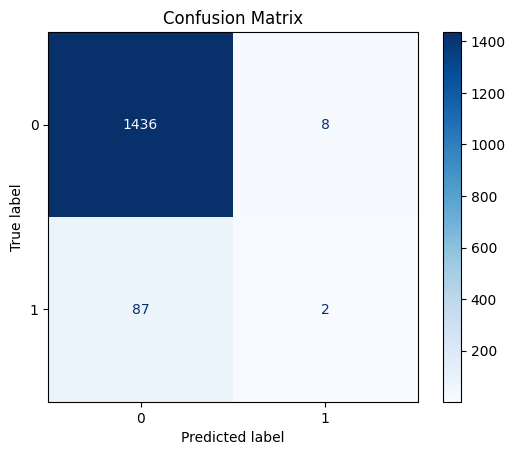

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#### ExtraTreesClassifier

In [ ]:
extra = ExtraTreesClassifier()

start_time = time.time()
extra.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.3f} seconds")
print("=" * 80)

y_train_pred = extra.predict(X_train)
train_table = evaluate_model(y_train, y_train_pred)

y_test_pred = extra.predict(X_test)
test_table = evaluate_model(y_test, y_test_pred)

table1_str = train_table.get_string(title="ExtraTrees Model - Training Metrics")
table2_str = test_table.get_string(title="ExtraTrees Model - Testing Metrics")

lines1 = table1_str.split('\n')
lines2 = table2_str.split('\n')

max_lines = max(len(lines1), len(lines2))
lines1 += [""] * (max_lines - len(lines1))
lines2 += [""] * (max_lines - len(lines2))

for l1, l2 in zip(lines1, lines2):
    print(f"{l1:<45} {l2}")
print("=" * 80)

cv_scores = cross_val_score(extra, X_train, y_train, cv=5, scoring='accuracy')
print("ExtraTrees Model - Cross-Validation Scores:")
print(f"CV Mean Accuracy: {cv_scores.mean():.3f}")
print(f"CV Standard Deviation: {cv_scores.std():.3f}")
print("=" * 80)
print()

clf_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(clf_report)


Training time: 0.259 seconds
+-------------------------------------+       +------------------------------------+
| ExtraTrees Model - Training Metrics |       | ExtraTrees Model - Testing Metrics |
+----------------------+--------------+       +---------------------+--------------+
|        Metric        |    Value     |       |        Metric       |    Value     |
+----------------------+--------------+       +---------------------+--------------+
|       Accuracy       |     1.0      |       |       Accuracy      |    0.933     |
|      Precision       |     1.0      |       |      Precision      |     0.19     |
|        Recall        |     1.0      |       |        Recall       |    0.045     |
|       F1 Score       |     1.0      |       |       F1 Score      |    0.073     |
|         AUC          |     1.0      |       |         AUC         |    0.517     |
+----------------------+--------------+       +---------------------+--------------+
ExtraTrees Model - Cross-Validation 

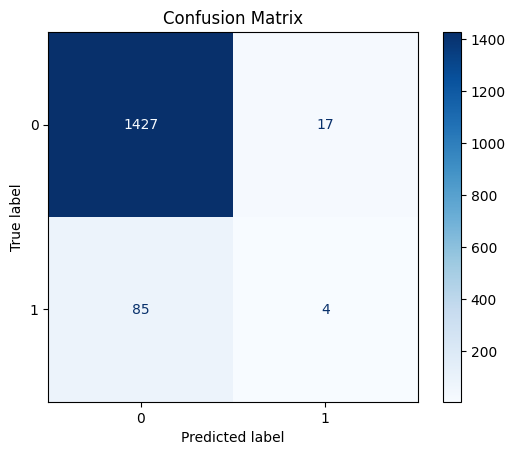

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, extra.predict(X_test)), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

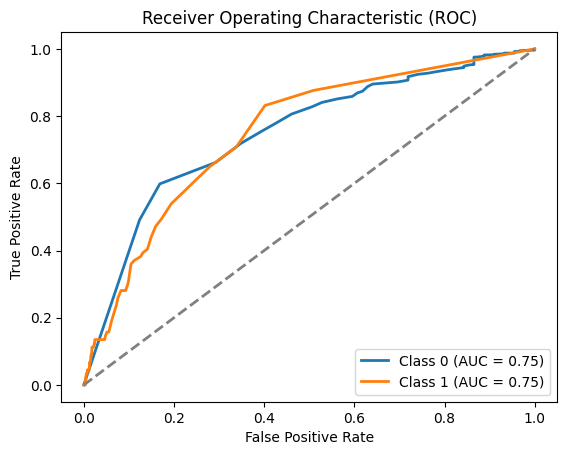

AUC: 0.75


In [ ]:
y_prob = extra.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob[:, 1])

fpr = {}
tpr = {}
thresholds = {}

for i in range(len(extra.classes_)):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(len(extra.classes_)):
	plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [ ]:
extra_param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'max_features': ['auto', 'sqrt', 'log2'],  
    'bootstrap': [True, False]
}

extra_grid_search = GridSearchCV(extra, extra_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
extra_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for ExtraTrees:")
table_hyperparams = PrettyTable()
table_hyperparams.field_names = ["Parameter", "Value"]
for param, value in extra_grid_search.best_params_.items():
    table_hyperparams.add_row([param, value])
print(table_hyperparams)
print("Best Accuracy for ExtraTrees: {:.4f}".format(extra_grid_search.best_score_))

Best Hyperparameters for ExtraTrees:
+-------------------+-------+
|     Parameter     | Value |
+-------------------+-------+
|     bootstrap     |  True |
|     max_depth     |  None |
|    max_features   |  log2 |
|  min_samples_leaf |   1   |
| min_samples_split |   5   |
|    n_estimators   |  200  |
+-------------------+-------+
Best Accuracy for ExtraTrees: 0.9765


In [ ]:
best_extra_model = ExtraTreesClassifier(**extra_grid_search.best_params_)
best_extra_model.fit(X_train, y_train)
y_test_pred = best_extra_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
print("Best ExtraTrees Model - Testing Metrics:")

table_testing = PrettyTable()
table_testing.field_names = ["Metric", "Value"]
table_testing.add_row(["Accuracy", round(test_accuracy, 3)])
table_testing.add_row(["Precision", round(test_precision, 3)])
table_testing.add_row(["Recall", round(test_recall, 3)])
table_testing.add_row(["F1 Score", round(test_f1, 3)])
table_testing.add_row(["AUC", round(test_auc, 3)])
print(table_testing)

Best ExtraTrees Model - Testing Metrics:
+-----------+-------+
|   Metric  | Value |
+-----------+-------+
|  Accuracy |  0.94 |
| Precision | 0.286 |
|   Recall  | 0.022 |
|  F1 Score | 0.042 |
|    AUC    |  0.51 |
+-----------+-------+


In [ ]:
cv_scores = cross_val_score(best_extra_model, X_train, y_train, cv=5, scoring='accuracy')
print("Best ExtraTrees Model - Cross-Validation Scores:")
print("CV Mean Accuracy: {:.4f}".format(round(cv_scores.mean(), 3)))
print("CV Standard Deviation: {:.4f}".format(round(cv_scores.std(), 3)))

Best ExtraTrees Model - Cross-Validation Scores:
CV Mean Accuracy: 0.9750
CV Standard Deviation: 0.0410


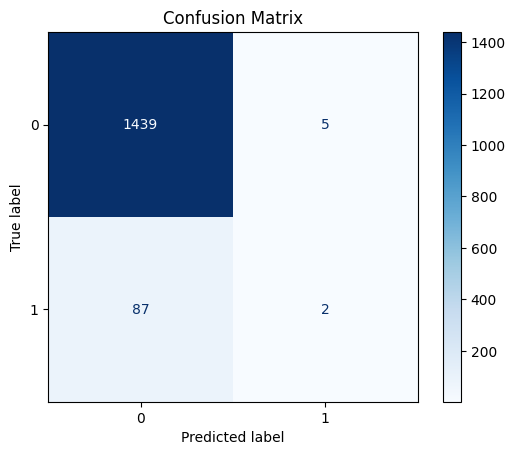

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#### StakingClassifier

In [ ]:
base_models = [
    ('knn', best_knn_model),            
    ('logis', best_logis_model),      
    ('rf', best_rf_model),            
    ('svm', best_svm_model),            
    ('lgbm', best_lgbm_model),          
    ('xgb', best_xgb_model),            
    ('gradient', best_gradient_model),   
    ('cat', best_cat_model),             
    ('extra', best_extra_model)          
]

In [ ]:
meta_model = LogisticRegression()
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

start_time = time.time()
stacking_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Stacking Model - Training time: {training_time:.3f} seconds")
print("=" * 80)

y_train_pred = stacking_model.predict(X_train)
train_table = evaluate_model(y_train, y_train_pred)

y_test_pred = stacking_model.predict(X_test)
test_table = evaluate_model(y_test, y_test_pred)

table1_str = train_table.get_string(title="Stacking Model - Training Metrics")
table2_str = test_table.get_string(title="Stacking Model - Testing Metrics")

lines1 = table1_str.split('\n')
lines2 = table2_str.split('\n')

max_lines = max(len(lines1), len(lines2))
lines1 += [""] * (max_lines - len(lines1))
lines2 += [""] * (max_lines - len(lines2))

for l1, l2 in zip(lines1, lines2):
    print(f"{l1:<45} {l2}")
print("=" * 80)

cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='accuracy')
print("Stacking Model - Cross-Validation Scores:")
print(f"CV Mean Accuracy: {cv_scores.mean():.3f}")
print(f"CV Standard Deviation: {cv_scores.std():.3f}")
print("=" * 80)

clf_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(clf_report)


Stacking Model - Training time: 14.660 seconds
+-----------------------------------+         +----------------------------------+
| Stacking Model - Training Metrics |         | Stacking Model - Testing Metrics |
+---------------------+-------------+         +--------------------+-------------+
|        Metric       |    Value    |         |       Metric       |    Value    |
+---------------------+-------------+         +--------------------+-------------+
|       Accuracy      |    0.992    |         |      Accuracy      |    0.938    |
|      Precision      |    0.999    |         |     Precision      |     0.25    |
|        Recall       |    0.984    |         |       Recall       |    0.034    |
|       F1 Score      |    0.992    |         |      F1 Score      |    0.059    |
|         AUC         |    0.992    |         |        AUC         |    0.514    |
+---------------------+-------------+         +--------------------+-------------+
Stacking Model - Cross-Validation Scores

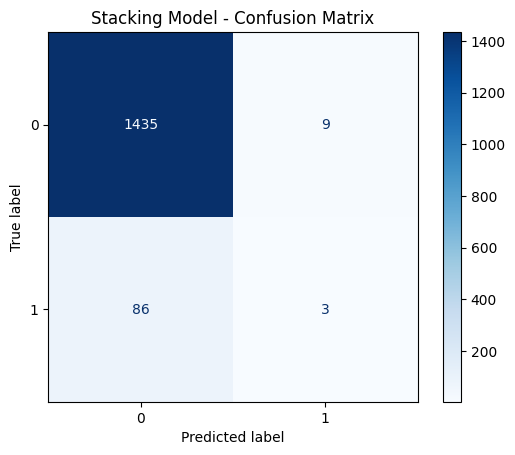

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, stacking_model.predict(X_test)), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Stacking Model - Confusion Matrix")
plt.show()

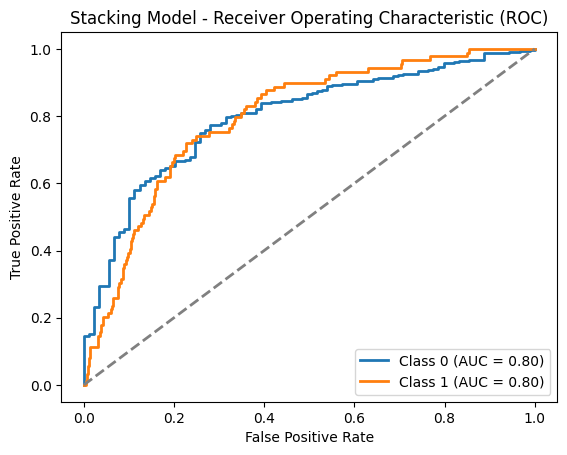

AUC: 0.80


In [ ]:
y_prob = stacking_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

fpr = {}
tpr = {}
thresholds = {}

for i in range(2):  
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

plt.figure()
for i in range(2):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stacking Model - Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

### Save model

In [ ]:
joblib.dump(best_knn_model, 'knn.pkl')
joblib.dump(best_logis_model, 'logistic.pkl')
joblib.dump(best_decision_model, 'decision.pkl')
joblib.dump(best_rf_model, 'randomforest.pkl')
joblib.dump(best_svm_model , 'svc.pkl')
joblib.dump(best_lgbm_model , 'lgbm.pkl')
joblib.dump(best_xgb_model , 'xgboost.pkl')
joblib.dump(best_gradient_model , 'gradient.pkl')
joblib.dump(best_cat_model  , 'catboost.pkl')
joblib.dump(best_extra_model  , 'extratree.pkl')
joblib.dump(stacking_model, 'stacking.pkl')

['stacking.pkl']